In [784]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [785]:
flight_traffic = pd.read_csv("flight_traffic.csv")
airlines = pd.read_csv("airlines.csv")
airports = pd.read_csv("airports.csv")
fares = pd.read_csv("fares.csv")
stock_prices = pd.read_csv("stock_prices.csv")
weather = pd.read_csv("weather.csv")
events_US = pd.read_csv("events_US.csv")
#Airports and Events needed some cleaning (They had ' in some of their data, needed removing)

In [786]:
stock_prices.head()

,timestamp,AA,UA,B6,OO,AS,NK,WN,DL,HA
0,4/6/18,51.12,69.6501,20.12,55.70,61.44,37.8576,55.865,53.67,40.20
1,4/5/18,52.14,70.6900,20.64,56.05,62.11,38.3000,56.860,54.21,41.20
2,4/4/18,52.04,69.9900,20.48,55.45,61.22,37.7000,56.360,53.86,40.50
3,4/3/18,51.47,69.1900,20.15,54.80,60.11,37.2200,55.970,53.72,38.75
4,4/2/18,49.78,66.7700,19.73,52.75,57.75,36.3500,54.340,51.95,36.85


In [787]:
events_US.head()

,date,city,state,event_name
0,2/1/17,St. Louis,MO,NHL Winter Classic
1,4/1/17,New York,NY,National Board of Review of Motion Pictures Aw...
2,5/1/17,New York,NY,Winter Jazzfest NYC
3,5/1/17,Las Vegas,NV,International Consumer Electronics Show (CES)
4,5/1/17,New York,NY,Jazz Connect Conference


In [788]:
weather.head()

,airport_id,airport_name,latitude,longitude,elevation,datetime,temperature,visibility,wind_direction,wind_speed,snow_depth,cloud_status
0,BUF,"BUFFALO NIAGARA INTERNATIONAL, NY US",42.9408,-78.7358,218.2,2017-01-01T00:54:00,3.9,16093,220,7.2,NaN,NaN
1,BUF,"BUFFALO NIAGARA INTERNATIONAL, NY US",42.9408,-78.7358,218.2,2017-01-01T06:54:00,0.6,16093,260,6.2,NaN,NaN
2,BUF,"BUFFALO NIAGARA INTERNATIONAL, NY US",42.9408,-78.7358,218.2,2017-01-01T12:54:00,-0.6,16093,250,5.1,NaN,9.0
3,BUF,"BUFFALO NIAGARA INTERNATIONAL, NY US",42.9408,-78.7358,218.2,2017-01-01T18:54:00,2.2,16093,240,5.7,NaN,9.0
4,BUF,"BUFFALO NIAGARA INTERNATIONAL, NY US",42.9408,-78.7358,218.2,2017-01-02T00:54:00,-0.6,16093,170,1.5,NaN,NaN


In [789]:
fares.head()

,quarter,airline_id,origin_airport,destination_airport,distance,10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,200,210,220,230,240,250,260,270,280,290,300,310,320,330,340,350,360,370,380,390,400,410,420,430,440,450,460,470,480,490,500,510,520,530,540,550,560,570,580,590,600,610,620,630,640,650,660,670,680,690,700,710,720,730,740,750,760,770,780,790,800,810,820,830,840,850,860,870,880,890,900,910,920,930,940,950,960,970,980,990,1000,1010,1020,1030,1040,1050,1060,1070,1080,1090,1100,1110,1120,1130,1140,1150,1160,1170,1180,1190,1200,1210,1220,1230,1240,1250,1260,1270,1280,1290,1300,1310,1320,1330,1340,1350,1360,1370,1380,1390,1400,1410,1420,1430,1440,1450,1460,1470,1480,1490,1500,1510,1520,1530,1540,1550,1560,1570,1580,1590,1600,1610,1620,1630,1640,1650,1660,1670,1680,1690,1700,1710,1720,1730,1740,1750,1760,1770,1780,1790,1800,1810,1820,1830,1840,1850,1860,1870,1880,1890,1900,1910,1920,1930,1940,1950,1960,1970,1980,1990,2000,2010,2020,2030,2040,2050,2060,2070,2080,2090,2100,2110,2120,2130,2140,2150,2160,2170,2180,2190,2200,2210,2220,2230,2240,2250,2260,2270,2280,2290,2300,2310,2320,2330,2340,2350,2360,2370,2380,2390,2400,2410,2420,2430,2440,2450,2460,2470,2480,2490,2500
0,1,AA,CLT,SGF,708,2,6,11,15,32,34,43,47,38,40,26,26,19,19,16,25,18,14,18,13,14,7,13,19,5,8,5,3,3,7,9,1,4,3,6,2,2,3,5,0,1,2,2,2,1,0,1,3,1,2,1,1,1,0,0,2,1,0,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,DL,DTW,SAN,1956,13,4,3,2,8,12,24,14,12,12,21,20,19,35,36,36,36,45,37,74,41,52,86,31,37,32,36,66,32,37,37,26,19,25,29,35,119,27,27,36,19,46,35,30,12,27,15,13,28,80,25,16,4,12,17,16,17,10,12,12,19,17,15,11,13,8,17,5,16,3,9,12,10,22,13,6,2,5,8,7,11,9,6,9,6,7,4,4,7,1,6,4,2,5,9,4,4,8,3,5,2,3,5,7,2,1,4,1,5,1,4,5,0,2,1,1,5,3,1,2,1,4,5,1,2,2,1,2,6,0,4,0,0,0,1,0,0,1,1,0,1,0,0,1,1,1,0,3,1,2,1,0,0,4,0,1,1,1,0,0,1,0,1,0,1,2,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,2,0,2,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,5,0,0,0,0,0,0,28
2,1,DL,MSP,ISN,546,7,11,14,36,52,54,40,41,35,42,42,18,24,16,17,14,10,12,12,13,8,4,3,6,5,6,7,4,0,6,3,1,2,3,2,0,5,4,1,1,1,1,0,1,0,1,1,1,0,1,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,AA,CLT,RDU,130,2573,1665,927,556,356,227,123,87,53,38,36,22,14,8,7,10,3,6,2,4,1,2,1,2,1,0,0,0,1,1,3,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,DL,ATL,RIC,481,112,186,379,650,799,678,739,644,582,445,446,316,254,233,222,232,165,133,103,87,89,90,82,64,47,49,37,35,40,41,18,18,22,22,33,13,5,7,9,12,7,6,7,5,4,15,8,10,3,4,9,4,8,2,0,3,5,0,1,1,0,2,3,4,3,2,0,2,2,0,6,0,1,2,2,1,0,0,3,0,0,2,0,1,0,1,2,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [790]:
airports.head()

,airport_id,airport_name,city,state,latitude,longitude
0,ABE,Lehigh Valley International Airport,Allentown,PA,40.65236,-75.44040
1,ABI,Abilene Regional Airport,Abilene,TX,32.41132,-99.68190
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,35.04022,-106.60919
3,ABR,Aberdeen Regional Airport,Aberdeen,SD,45.44906,-98.42183
4,ABY,Southwest Georgia Regional Airport,Albany,GA,31.53552,-84.19447


In [791]:
airlines.head()

,airline_id,airline_name
0,AA,American Airlines Inc.
1,DL,Delta Air Lines Inc.
2,UA,United Airlines Inc.
3,WN,Southwest Airlines Co.
4,HA,Hawaiian Airlines Inc.


In [792]:
flight_traffic.head()

,year,month,day,airline_id,origin_airport,destination_airport,scheduled_departure,actual_departure,taxi_out,wheels_off,wheels_on,taxi_in,scheduled_arrival,actual_arrival,cancelled,diverted,scheduled_elapsed,actual_elapsed,distance,airline_delay,weather_delay,air_system_delay,security_delay,aircraft_delay
0,2017,1,17,AA,CLT,PHX,1619,1616.0,17.0,1633.0,1837.0,5.0,1856,1842.0,0.0,0.0,277.0,266.0,1773.0,NaN,NaN,NaN,NaN,NaN
1,2017,1,18,AA,CLT,PHX,1619,1614.0,13.0,1627.0,1815.0,6.0,1856,1821.0,0.0,0.0,277.0,247.0,1773.0,NaN,NaN,NaN,NaN,NaN
2,2017,1,19,AA,CLT,PHX,1619,1611.0,17.0,1628.0,1824.0,2.0,1856,1826.0,0.0,0.0,277.0,255.0,1773.0,NaN,NaN,NaN,NaN,NaN
3,2017,1,20,AA,CLT,PHX,1619,1656.0,18.0,1714.0,1926.0,3.0,1856,1929.0,0.0,0.0,277.0,273.0,1773.0,33.0,0.0,0.0,0.0,0.0
4,2017,1,21,AA,CLT,PHX,1619,1632.0,17.0,1649.0,1854.0,4.0,1856,1858.0,0.0,0.0,277.0,266.0,1773.0,NaN,NaN,NaN,NaN,NaN


## Understanding Data

In [793]:
flight_traffic.head(10)

,year,month,day,airline_id,origin_airport,destination_airport,scheduled_departure,actual_departure,taxi_out,wheels_off,wheels_on,taxi_in,scheduled_arrival,actual_arrival,cancelled,diverted,scheduled_elapsed,actual_elapsed,distance,airline_delay,weather_delay,air_system_delay,security_delay,aircraft_delay
0,2017,1,17,AA,CLT,PHX,1619,1616.0,17.0,1633.0,1837.0,5.0,1856,1842.0,0.0,0.0,277.0,266.0,1773.0,NaN,NaN,NaN,NaN,NaN
1,2017,1,18,AA,CLT,PHX,1619,1614.0,13.0,1627.0,1815.0,6.0,1856,1821.0,0.0,0.0,277.0,247.0,1773.0,NaN,NaN,NaN,NaN,NaN
2,2017,1,19,AA,CLT,PHX,1619,1611.0,17.0,1628.0,1824.0,2.0,1856,1826.0,0.0,0.0,277.0,255.0,1773.0,NaN,NaN,NaN,NaN,NaN
3,2017,1,20,AA,CLT,PHX,1619,1656.0,18.0,1714.0,1926.0,3.0,1856,1929.0,0.0,0.0,277.0,273.0,1773.0,33.0,0.0,0.0,0.0,0.0
4,2017,1,21,AA,CLT,PHX,1619,1632.0,17.0,1649.0,1854.0,4.0,1856,1858.0,0.0,0.0,277.0,266.0,1773.0,NaN,NaN,NaN,NaN,NaN
5,2017,1,22,AA,CLT,PHX,1619,1636.0,27.0,1703.0,1917.0,4.0,1856,1921.0,0.0,0.0,277.0,285.0,1773.0,0.0,0.0,8.0,0.0,17.0
6,2017,1,23,AA,CLT,PHX,1619,1616.0,20.0,1636.0,1900.0,7.0,1856,1907.0,0.0,0.0,277.0,291.0,1773.0,NaN,NaN,NaN,NaN,NaN
7,2017,1,24,AA,CLT,PHX,1619,1619.0,18.0,1637.0,1858.0,6.0,1856,1904.0,0.0,0.0,277.0,285.0,1773.0,NaN,NaN,NaN,NaN,NaN
8,2017,1,25,AA,CLT,PHX,1619,1616.0,23.0,1639.0,1901.0,5.0,1856,1906.0,0.0,0.0,277.0,290.0,1773.0,NaN,NaN,NaN,NaN,NaN
9,2017,1,26,AA,CLT,PHX,1619,1618.0,11.0,1629.0,1857.0,5.0,1856,1902.0,0.0,0.0,277.0,284.0,1773.0,NaN,NaN,NaN,NaN,NaN


In [794]:
flight_traffic.tail()

,year,month,day,airline_id,origin_airport,destination_airport,scheduled_departure,actual_departure,taxi_out,wheels_off,wheels_on,taxi_in,scheduled_arrival,actual_arrival,cancelled,diverted,scheduled_elapsed,actual_elapsed,distance,airline_delay,weather_delay,air_system_delay,security_delay,aircraft_delay
5674616,2017,12,17,UA,DEN,SJC,1913,1910.0,14.0,1924.0,2022.0,4.0,2054,2026.0,0.0,0.0,161.0,136.0,948.0,NaN,NaN,NaN,NaN,NaN
5674617,2017,12,17,UA,DFW,DEN,1638,1632.0,19.0,1651.0,1721.0,6.0,1747,1727.0,0.0,0.0,129.0,115.0,641.0,NaN,NaN,NaN,NaN,NaN
5674618,2017,12,17,UA,AUS,SFO,725,719.0,20.0,739.0,853.0,6.0,927,859.0,0.0,0.0,242.0,220.0,1504.0,NaN,NaN,NaN,NaN,NaN
5674619,2017,12,17,UA,MCO,EWR,1008,1007.0,11.0,1018.0,1214.0,8.0,1245,1222.0,0.0,0.0,157.0,135.0,937.0,NaN,NaN,NaN,NaN,NaN
5674620,2017,12,17,UA,IAH,MEM,2000,2000.0,25.0,2025.0,2125.0,3.0,2135,2128.0,0.0,0.0,95.0,88.0,468.0,NaN,NaN,NaN,NaN,NaN


In [795]:
flight_traffic.shape

(5674621, 24)

In [796]:
flight_traffic.describe()

,year,month,day,scheduled_departure,actual_departure,taxi_out,wheels_off,wheels_on,taxi_in,scheduled_arrival,actual_arrival,cancelled,diverted,scheduled_elapsed,actual_elapsed,distance,airline_delay,weather_delay,air_system_delay,security_delay,aircraft_delay
count,5674621.0,5.674621e+06,5.674621e+06,5.674621e+06,5.594313e+06,5.592476e+06,5.592480e+06,5.589947e+06,5.589947e+06,5.674621e+06,5.589947e+06,5.674621e+06,5.674621e+06,5.674614e+06,5.579410e+06,5.674621e+06,1.029473e+06,1.029473e+06,1.029473e+06,1.029473e+06,1.029473e+06
mean,2017.0,6.546344e+00,1.576329e+01,1.329969e+03,1.333704e+03,1.677994e+01,1.355794e+03,1.464579e+03,7.507610e+00,1.489308e+03,1.468881e+03,1.457243e-02,2.208077e-03,1.469928e+02,1.417624e+02,8.566888e+02,1.992933e+01,2.719604e+00,1.602838e+01,9.147399e-02,2.516343e+01
std,0.0,3.392347e+00,8.775588e+00,4.909376e+02,5.043987e+02,9.365385e+00,5.062227e+02,5.340316e+02,5.913152e+00,5.190175e+02,5.383984e+02,1.198335e-01,4.693828e-02,7.712135e+01,7.666672e+01,6.244887e+02,6.227602e+01,2.434302e+01,3.590292e+01,3.028055e+00,4.771769e+01
min,2017.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.500000e+01,3.100000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2017.0,4.000000e+00,8.000000e+00,9.120000e+02,9.140000e+02,1.100000e+01,9.300000e+02,1.046000e+03,4.000000e+00,1.103000e+03,1.050000e+03,0.000000e+00,0.000000e+00,9.000000e+01,8.500000e+01,3.910000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2017.0,7.000000e+00,1.600000e+01,1.323000e+03,1.327000e+03,1.400000e+01,1.340000e+03,1.506000e+03,6.000000e+00,1.520000e+03,1.510000e+03,0.000000e+00,0.000000e+00,1.280000e+02,1.230000e+02,6.800000e+02,1.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,4.000000e+00
75%,2017.0,9.000000e+00,2.300000e+01,1.735000e+03,1.743000e+03,2.000000e+01,1.758000e+03,1.913000e+03,9.000000e+00,1.920000e+03,1.918000e+03,0.000000e+00,0.000000e+00,1.800000e+02,1.750000e+02,1.097000e+03,1.700000e+01,0.000000e+00,1.900000e+01,0.000000e+00,3.100000e+01
max,2017.0,1.200000e+01,3.100000e+01,2.359000e+03,2.400000e+03,1.830000e+02,2.400000e+03,2.400000e+03,4.140000e+02,2.359000e+03,2.400000e+03,1.000000e+00,1.000000e+00,7.180000e+02,7.840000e+02,4.983000e+03,1.934000e+03,1.934000e+03,1.605000e+03,8.270000e+02,1.756000e+03


In [797]:
flight_traffic.isnull().sum()

year                         0
month                        0
day                          0
airline_id                   0
origin_airport               0
destination_airport          0
scheduled_departure          0
actual_departure         80308
taxi_out                 82145
wheels_off               82141
wheels_on                84674
taxi_in                  84674
scheduled_arrival            0
actual_arrival           84674
cancelled                    0
diverted                     0
scheduled_elapsed            7
actual_elapsed           95211
distance                     0
airline_delay          4645148
weather_delay          4645148
air_system_delay       4645148
security_delay         4645148
aircraft_delay         4645148
dtype: int64

In [798]:
stock_prices.head()

,timestamp,AA,UA,B6,OO,AS,NK,WN,DL,HA
0,4/6/18,51.12,69.6501,20.12,55.70,61.44,37.8576,55.865,53.67,40.20
1,4/5/18,52.14,70.6900,20.64,56.05,62.11,38.3000,56.860,54.21,41.20
2,4/4/18,52.04,69.9900,20.48,55.45,61.22,37.7000,56.360,53.86,40.50
3,4/3/18,51.47,69.1900,20.15,54.80,60.11,37.2200,55.970,53.72,38.75
4,4/2/18,49.78,66.7700,19.73,52.75,57.75,36.3500,54.340,51.95,36.85


In [799]:
stock_prices.tail()

,timestamp,AA,UA,B6,OO,AS,NK,WN,DL,HA
375,10/7/16,37.73,52.82,17.39,28.50,68.11,42.24,38.47,38.95,49.50
376,10/6/16,38.17,53.98,17.62,28.52,69.09,42.99,39.17,39.94,50.82
377,10/5/16,37.87,53.82,17.86,28.06,68.31,43.16,39.10,40.32,50.83
378,10/4/16,37.63,53.73,17.83,27.89,68.71,43.64,39.16,40.15,50.63
379,10/3/16,37.70,53.25,17.66,27.70,67.09,43.74,39.74,39.98,49.99


In [800]:
stock_prices.describe()

,AA,UA,B6,OO,AS,NK,WN,DL,HA
count,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000
mean,47.863211,68.253974,20.788039,41.095000,79.822684,46.577652,55.283460,50.130434,45.161553
std,4.335259,6.954955,1.499153,8.663919,11.084383,8.080543,6.138288,4.104723,6.790032
min,37.380000,52.820000,16.930000,27.700000,57.750000,32.090000,38.400000,38.940000,32.850000
25%,45.242500,63.350000,19.780000,35.368750,69.735000,39.217500,52.662500,47.810000,38.987500
50%,47.695000,68.480000,20.845000,36.850000,80.495000,47.280000,55.960000,50.130000,45.975000
75%,51.030000,73.607500,22.050000,49.337500,89.185000,53.555000,59.172500,52.920000,50.362500
max,58.470000,82.030000,23.750000,60.300000,100.240000,59.740000,66.290000,60.130000,60.300000


In [801]:
stock_prices.isnull().sum()

timestamp    0
AA           0
UA           0
B6           0
OO           0
AS           0
NK           0
WN           0
DL           0
HA           0
dtype: int64

In [802]:
stock_prices_X = stock_prices['timestamp']
stock_prices_Y = stock_prices.drop('timestamp', axis=1)
print([stock for stock in stock_prices_Y])

['AA', 'UA', 'B6', 'OO', 'AS', 'NK', 'WN', 'DL', 'HA']


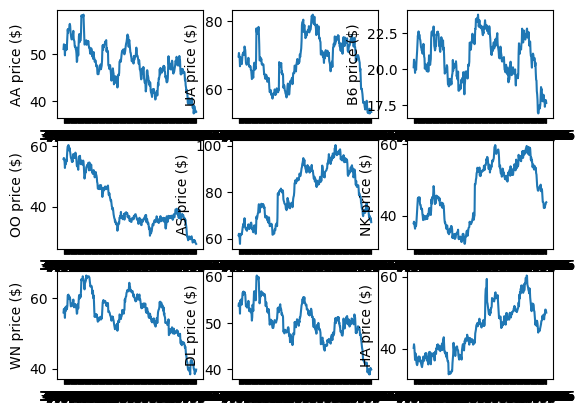

In [803]:
for i, stock in enumerate(stock_prices_Y):
    plt.subplot(3, 3, i+1)
    plt.plot(stock_prices_X, stock_prices_Y[stock])
    plt.ylabel(f"{stock} price ($)")
plt.show()

In [804]:
fares.head()

,quarter,airline_id,origin_airport,destination_airport,distance,10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,200,210,220,230,240,250,260,270,280,290,300,310,320,330,340,350,360,370,380,390,400,410,420,430,440,450,460,470,480,490,500,510,520,530,540,550,560,570,580,590,600,610,620,630,640,650,660,670,680,690,700,710,720,730,740,750,760,770,780,790,800,810,820,830,840,850,860,870,880,890,900,910,920,930,940,950,960,970,980,990,1000,1010,1020,1030,1040,1050,1060,1070,1080,1090,1100,1110,1120,1130,1140,1150,1160,1170,1180,1190,1200,1210,1220,1230,1240,1250,1260,1270,1280,1290,1300,1310,1320,1330,1340,1350,1360,1370,1380,1390,1400,1410,1420,1430,1440,1450,1460,1470,1480,1490,1500,1510,1520,1530,1540,1550,1560,1570,1580,1590,1600,1610,1620,1630,1640,1650,1660,1670,1680,1690,1700,1710,1720,1730,1740,1750,1760,1770,1780,1790,1800,1810,1820,1830,1840,1850,1860,1870,1880,1890,1900,1910,1920,1930,1940,1950,1960,1970,1980,1990,2000,2010,2020,2030,2040,2050,2060,2070,2080,2090,2100,2110,2120,2130,2140,2150,2160,2170,2180,2190,2200,2210,2220,2230,2240,2250,2260,2270,2280,2290,2300,2310,2320,2330,2340,2350,2360,2370,2380,2390,2400,2410,2420,2430,2440,2450,2460,2470,2480,2490,2500
0,1,AA,CLT,SGF,708,2,6,11,15,32,34,43,47,38,40,26,26,19,19,16,25,18,14,18,13,14,7,13,19,5,8,5,3,3,7,9,1,4,3,6,2,2,3,5,0,1,2,2,2,1,0,1,3,1,2,1,1,1,0,0,2,1,0,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,DL,DTW,SAN,1956,13,4,3,2,8,12,24,14,12,12,21,20,19,35,36,36,36,45,37,74,41,52,86,31,37,32,36,66,32,37,37,26,19,25,29,35,119,27,27,36,19,46,35,30,12,27,15,13,28,80,25,16,4,12,17,16,17,10,12,12,19,17,15,11,13,8,17,5,16,3,9,12,10,22,13,6,2,5,8,7,11,9,6,9,6,7,4,4,7,1,6,4,2,5,9,4,4,8,3,5,2,3,5,7,2,1,4,1,5,1,4,5,0,2,1,1,5,3,1,2,1,4,5,1,2,2,1,2,6,0,4,0,0,0,1,0,0,1,1,0,1,0,0,1,1,1,0,3,1,2,1,0,0,4,0,1,1,1,0,0,1,0,1,0,1,2,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,2,0,2,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,5,0,0,0,0,0,0,28
2,1,DL,MSP,ISN,546,7,11,14,36,52,54,40,41,35,42,42,18,24,16,17,14,10,12,12,13,8,4,3,6,5,6,7,4,0,6,3,1,2,3,2,0,5,4,1,1,1,1,0,1,0,1,1,1,0,1,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,AA,CLT,RDU,130,2573,1665,927,556,356,227,123,87,53,38,36,22,14,8,7,10,3,6,2,4,1,2,1,2,1,0,0,0,1,1,3,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,DL,ATL,RIC,481,112,186,379,650,799,678,739,644,582,445,446,316,254,233,222,232,165,133,103,87,89,90,82,64,47,49,37,35,40,41,18,18,22,22,33,13,5,7,9,12,7,6,7,5,4,15,8,10,3,4,9,4,8,2,0,3,5,0,1,1,0,2,3,4,3,2,0,2,2,0,6,0,1,2,2,1,0,0,3,0,0,2,0,1,0,1,2,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [805]:
fares.tail()

,quarter,airline_id,origin_airport,destination_airport,distance,10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,200,210,220,230,240,250,260,270,280,290,300,310,320,330,340,350,360,370,380,390,400,410,420,430,440,450,460,470,480,490,500,510,520,530,540,550,560,570,580,590,600,610,620,630,640,650,660,670,680,690,700,710,720,730,740,750,760,770,780,790,800,810,820,830,840,850,860,870,880,890,900,910,920,930,940,950,960,970,980,990,1000,1010,1020,1030,1040,1050,1060,1070,1080,1090,1100,1110,1120,1130,1140,1150,1160,1170,1180,1190,1200,1210,1220,1230,1240,1250,1260,1270,1280,1290,1300,1310,1320,1330,1340,1350,1360,1370,1380,1390,1400,1410,1420,1430,1440,1450,1460,1470,1480,1490,1500,1510,1520,1530,1540,1550,1560,1570,1580,1590,1600,1610,1620,1630,1640,1650,1660,1670,1680,1690,1700,1710,1720,1730,1740,1750,1760,1770,1780,1790,1800,1810,1820,1830,1840,1850,1860,1870,1880,1890,1900,1910,1920,1930,1940,1950,1960,1970,1980,1990,2000,2010,2020,2030,2040,2050,2060,2070,2080,2090,2100,2110,2120,2130,2140,2150,2160,2170,2180,2190,2200,2210,2220,2230,2240,2250,2260,2270,2280,2290,2300,2310,2320,2330,2340,2350,2360,2370,2380,2390,2400,2410,2420,2430,2440,2450,2460,2470,2480,2490,2500
80818,4,AA,STL,MSY,604,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
80819,4,WN,SDF,ROC,544,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
80820,4,WN,BDL,ONT,2482,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
80821,4,WN,HRL,TUL,695,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
80822,4,UA,EVV,HPN,766,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [806]:
fares.describe()

,quarter,distance,10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,200,210,220,230,240,250,260,270,280,290,300,310,320,330,340,350,360,370,380,390,400,410,420,430,440,450,460,470,480,490,500,510,520,530,540,550,560,570,580,590,600,610,620,630,640,650,660,670,680,690,700,710,720,730,740,750,760,770,780,790,800,810,820,830,840,850,860,870,880,890,900,910,920,930,940,950,960,970,980,990,1000,1010,1020,1030,1040,1050,1060,1070,1080,1090,1100,1110,1120,1130,1140,1150,1160,1170,1180,1190,1200,1210,1220,1230,1240,1250,1260,1270,1280,1290,1300,1310,1320,1330,1340,1350,1360,1370,1380,1390,1400,1410,1420,1430,1440,1450,1460,1470,1480,1490,1500,1510,1520,1530,1540,1550,1560,1570,1580,1590,1600,1610,1620,1630,1640,1650,1660,1670,1680,1690,1700,1710,1720,1730,1740,1750,1760,1770,1780,1790,1800,1810,1820,1830,1840,1850,1860,1870,1880,1890,1900,1910,1920,1930,1940,1950,1960,1970,1980,1990,2000,2010,2020,2030,2040,2050,2060,2070,2080,2090,2100,2110,2120,2130,2140,2150,2160,2170,2180,2190,2200,2210,2220,2230,2240,2250,2260,2270,2280,2290,2300,2310,2320,2330,2340,2350,2360,2370,2380,2390,2400,2410,2420,2430,2440,2450,2460,2470,2480,2490,2500
count,80823.000000,80823.000000,80823.000000,80823.000000,80823.000000,80823.000000,80823.000000,80823.000000,80823.000000,80823.000000,80823.000000,80823.000000,80823.000000,80823.000000,80823.000000,80823.000000,80823.000000,80823.000000,80823.000000,80823.000000,80823.000000,80823.000000,80823.000000,80823.000000,80823.000000,80823.000000,80823.000000,80823.000000,80823.000000,80823.000000,80823.000000,80823.000000,80823.000000,80823.000000,80823.000000,80823.000000,80823.000000,80823.000000,80823.000000,80823.000000,80823.000000,80823.000000,80823.000000,80823.000000,80823.000000,80823.000000,80823.000000,80823.000000,80823.000000,80823.000000,80823.000000,80823.000000,80823.000000,80823.000000,80823.000000,80823.000000,80823.000000,80823.000000,80823.000000,80823.000000,80823.000000,80823.000000,80823.000000,80823.000000,80823.000000,80823.000000,80823.000000,80823.000000,80823.000000,80823.000000,80823.000000,80823.000000,80823.000000,80823.000000,80823.000000,80823.000000,80823.000000,80823.000000,80823.000000,80823.000000,80823.000000,80823.000000,80823.000000,80823.000000,80823.000000,80823.000000,80823.000000,80823.000000,80823.000000,80823.000000,80823.000000,80823.000000,80823.000000,80823.000000,80823.000000,80823.000000,80823.000000,80823.000000,80823.000000,80823.000000,80823.000000,80823.000000,80823.000000,80823.000000,80823.000000,80823.000000,80823.000000,80823.000000,80823.000000,80823.000000,80823.000000,80823.000000,80823.000000,80823.000000,80823.000000,80823.000000,80823.000000,80823.000000,80823.000000,80823.000000,80823.000000,80823.000000,80823.000000,80823.000000,80823.000000,80823.000000,80823.000000,80823.000000,80823.000000,80823.000000,80823.000000,80823.000000,80823.000000,80823.000000,80823.000000,80823.000000,80823.000000,80823.000000,80823.000000,80823.000000,80823.000000,80823.000000,80823.000000,80823.000000,80823.000000,80823.000000,80823.000000,80823.000000,80823.000000,80823.000000,80823.000000,80823.000000,80823.000000,80823.000000,80823.000000,80823.000000,80823.000000,80823.000000,80823.000000,80823.000000,80823.000000,80823.000000,80823.000000,80823.000000,80823.000000,80823.000000,80823.000000,80823.000000,80823.000000,80823.000000,80823.000000,80823.000000,80823.000000,80823.000000,80823.000000,80823.000000,80823.000000,80823.000000,80823.000000,80823.000000,80823.000000,80823.000000,80823.000000,80823.000000,80823.000000,80823.000000,80823.000000,80823.000000,80823.000000,80823.000000,80823.000000,80823.000000,80823.000000,80823.000000,80823.000000,80823.000000,80823.000000,80823.000000,80823.000000,80823.000000,80823.000000,80823.000000,80823.000000,80823.000000,80823.000000,80823.000000,80823.000000,80823.00000,80823.000000,80823.000000,80823.000000,80823.000000,80823.000000,80823.000000,80823.000000,80823.000000,80823.000000,80823.000000,8

In [807]:
weather.head()

,airport_id,airport_name,latitude,longitude,elevation,datetime,temperature,visibility,wind_direction,wind_speed,snow_depth,cloud_status
0,BUF,"BUFFALO NIAGARA INTERNATIONAL, NY US",42.9408,-78.7358,218.2,2017-01-01T00:54:00,3.9,16093,220,7.2,NaN,NaN
1,BUF,"BUFFALO NIAGARA INTERNATIONAL, NY US",42.9408,-78.7358,218.2,2017-01-01T06:54:00,0.6,16093,260,6.2,NaN,NaN
2,BUF,"BUFFALO NIAGARA INTERNATIONAL, NY US",42.9408,-78.7358,218.2,2017-01-01T12:54:00,-0.6,16093,250,5.1,NaN,9.0
3,BUF,"BUFFALO NIAGARA INTERNATIONAL, NY US",42.9408,-78.7358,218.2,2017-01-01T18:54:00,2.2,16093,240,5.7,NaN,9.0
4,BUF,"BUFFALO NIAGARA INTERNATIONAL, NY US",42.9408,-78.7358,218.2,2017-01-02T00:54:00,-0.6,16093,170,1.5,NaN,NaN


In [808]:
weather.tail()

,airport_id,airport_name,latitude,longitude,elevation,datetime,temperature,visibility,wind_direction,wind_speed,snow_depth,cloud_status
353859,HLN,"HELENA AIRPORT ASOS, MT US",46.6056,-111.9636,1166.8,2017-06-01T18:53:00,23.9,16093,30,3.6,NaN,NaN
353860,HLN,"HELENA AIRPORT ASOS, MT US",46.6056,-111.9636,1166.8,2018-01-01T00:53:00,-22.2,16093,999,0.0,NaN,NaN
353861,HLN,"HELENA AIRPORT ASOS, MT US",46.6056,-111.9636,1166.8,2018-01-01T06:53:00,-20.0,16093,999,0.0,NaN,NaN
353862,HLN,"HELENA AIRPORT ASOS, MT US",46.6056,-111.9636,1166.8,2018-01-01T12:53:00,-20.6,16093,999,0.0,NaN,NaN
353863,HLN,"HELENA AIRPORT ASOS, MT US",46.6056,-111.9636,1166.8,2018-01-01T18:53:00,-21.1,11265,999,0.0,NaN,NaN


In [809]:
weather.describe()

,latitude,longitude,elevation,temperature,visibility,wind_direction,wind_speed,snow_depth,cloud_status
count,353864.000000,353864.000000,353864.000000,353864.000000,353864.000000,353864.000000,353864.000000,161.000000,219924.0
mean,39.274844,-97.731652,381.337180,15.689767,16853.622745,326.495860,7.193903,13.142857,9.0
std,8.424115,21.302403,541.440381,47.625813,43579.156542,315.626276,59.468636,14.473189,0.0
min,17.699700,-176.650000,1.200000,-45.000000,0.000000,4.000000,0.000000,0.000000,9.0
25%,33.565560,-108.540000,29.000000,5.600000,16093.000000,130.000000,2.100000,5.000000,9.0
50%,39.483800,-92.838890,187.500000,15.000000,16093.000000,220.000000,3.100000,8.000000,9.0
75%,43.116700,-82.537500,389.200000,22.800000,16093.000000,330.000000,5.100000,15.000000,9.0
max,71.283400,-64.812500,2353.100000,999.900000,999999.000000,999.000000,999.900000,79.000000,9.0


In [810]:
weather['cloud_status'].value_counts()
#Cloud Status is irrelevant, all airports either have no info or the same info

cloud_status
9.0    219924
Name: count, dtype: int64

In [811]:
weather['snow_depth'].fillna(0, inplace=True)

In [812]:
weather['snow_depth'].isnull().sum()

0

In [813]:
flight_traffic['airline_delay'].value_counts()

airline_delay
0.0       514242
1.0        20899
2.0        20422
3.0        20071
4.0        19516
           ...  
736.0          1
979.0          1
1322.0         1
1067.0         1
1219.0         1
Name: count, Length: 1329, dtype: int64

In [814]:
flight_traffic['air_system_delay'].value_counts()

air_system_delay
0.0       472540
1.0        23727
15.0       22345
2.0        20262
16.0       19878
           ...  
968.0          1
1246.0         1
810.0          1
1173.0         1
1014.0         1
Name: count, Length: 821, dtype: int64

In [815]:
flight_traffic.columns

Index(['year', 'month', 'day', 'airline_id', 'origin_airport',
       'destination_airport', 'scheduled_departure', 'actual_departure',
       'taxi_out', 'wheels_off', 'wheels_on', 'taxi_in', 'scheduled_arrival',
       'actual_arrival', 'cancelled', 'diverted', 'scheduled_elapsed',
       'actual_elapsed', 'distance', 'airline_delay', 'weather_delay',
       'air_system_delay', 'security_delay', 'aircraft_delay'],
      dtype='object')

In [816]:
stock_prices.info

<bound method DataFrame.info of     timestamp     AA       UA     B6     OO     AS       NK      WN     DL  \
0      4/6/18  51.12  69.6501  20.12  55.70  61.44  37.8576  55.865  53.67   
1      4/5/18  52.14  70.6900  20.64  56.05  62.11  38.3000  56.860  54.21   
2      4/4/18  52.04  69.9900  20.48  55.45  61.22  37.7000  56.360  53.86   
3      4/3/18  51.47  69.1900  20.15  54.80  60.11  37.2200  55.970  53.72   
4      4/2/18  49.78  66.7700  19.73  52.75  57.75  36.3500  54.340  51.95   
..        ...    ...      ...    ...    ...    ...      ...     ...    ...   
375   10/7/16  37.73  52.8200  17.39  28.50  68.11  42.2400  38.470  38.95   
376   10/6/16  38.17  53.9800  17.62  28.52  69.09  42.9900  39.170  39.94   
377   10/5/16  37.87  53.8200  17.86  28.06  68.31  43.1600  39.100  40.32   
378   10/4/16  37.63  53.7300  17.83  27.89  68.71  43.6400  39.160  40.15   
379   10/3/16  37.70  53.2500  17.66  27.70  67.09  43.7400  39.740  39.98   

        HA  
0    40.20  
1    

## Delay EDA

In [817]:
stock_copy = stock_prices.copy()
for stock in stock_prices_Y:
    stock_copy[f'{stock}_price_diff'] = stock_copy[stock] - stock_copy[stock].shift(-1)

In [818]:
stock_copy.head(10)

,timestamp,AA,UA,B6,OO,AS,NK,WN,DL,HA,AA_price_diff,UA_price_diff,B6_price_diff,OO_price_diff,AS_price_diff,NK_price_diff,WN_price_diff,DL_price_diff,HA_price_diff
0,4/6/18,51.12,69.6501,20.12,55.70,61.44,37.8576,55.865,53.67,40.20,-1.02,-1.0399,-0.52,-0.35,-0.67,-0.4424,-0.995,-0.54,-1.00
1,4/5/18,52.14,70.6900,20.64,56.05,62.11,38.3000,56.860,54.21,41.20,0.10,0.7000,0.16,0.60,0.89,0.6000,0.500,0.35,0.70
2,4/4/18,52.04,69.9900,20.48,55.45,61.22,37.7000,56.360,53.86,40.50,0.57,0.8000,0.33,0.65,1.11,0.4800,0.390,0.14,1.75
3,4/3/18,51.47,69.1900,20.15,54.80,60.11,37.2200,55.970,53.72,38.75,1.69,2.4200,0.42,2.05,2.36,0.8700,1.630,1.77,1.90
4,4/2/18,49.78,66.7700,19.73,52.75,57.75,36.3500,54.340,51.95,36.85,-2.18,-2.7000,-0.59,-1.65,-4.21,-1.4300,-2.940,-2.86,-1.85
5,3/29/18,51.96,69.4700,20.32,54.40,61.96,37.7800,57.280,54.81,38.70,1.11,1.5600,0.15,0.45,0.39,0.7900,1.030,0.88,0.35
6,3/28/18,50.85,67.9100,20.17,53.95,61.57,36.9900,56.250,53.93,38.35,-0.05,-0.2700,0.22,-0.35,0.08,-0.2000,-0.440,-0.33,1.20
7,3/27/18,50.90,68.1800,19.95,54.30,61.49,37.1900,56.690,54.26,37.15,-0.96,-0.3000,-0.53,-1.30,-0.67,-1.0800,-0.900,-0.80,0.95
8,3/26/18,51.86,68.4800,20.48,55.60,62.16,38.2700,57.590,55.06,36.20,0.85,1.0900,-0.36,0.65,0.28,-1.6900,0.870,1.16,0.60
9,3/23/18,51.01,67.3900,20.84,54.95,61.88,39.9600,56.720,53.90,35.60,-1.30,-1.0600,-0.43,-1.90,-0.94,-1.3100,-0.280,-0.77,0.20


In [819]:
stock_copy.tail()

,timestamp,AA,UA,B6,OO,AS,NK,WN,DL,HA,AA_price_diff,UA_price_diff,B6_price_diff,OO_price_diff,AS_price_diff,NK_price_diff,WN_price_diff,DL_price_diff,HA_price_diff
375,10/7/16,37.73,52.82,17.39,28.50,68.11,42.24,38.47,38.95,49.50,-0.44,-1.16,-0.23,-0.02,-0.98,-0.75,-0.70,-0.99,-1.32
376,10/6/16,38.17,53.98,17.62,28.52,69.09,42.99,39.17,39.94,50.82,0.30,0.16,-0.24,0.46,0.78,-0.17,0.07,-0.38,-0.01
377,10/5/16,37.87,53.82,17.86,28.06,68.31,43.16,39.10,40.32,50.83,0.24,0.09,0.03,0.17,-0.40,-0.48,-0.06,0.17,0.20
378,10/4/16,37.63,53.73,17.83,27.89,68.71,43.64,39.16,40.15,50.63,-0.07,0.48,0.17,0.19,1.62,-0.10,-0.58,0.17,0.64
379,10/3/16,37.70,53.25,17.66,27.70,67.09,43.74,39.74,39.98,49.99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [820]:
stock_copy.describe()

,AA,UA,B6,OO,AS,NK,WN,DL,HA,AA_price_diff,UA_price_diff,B6_price_diff,OO_price_diff,AS_price_diff,NK_price_diff,WN_price_diff,DL_price_diff,HA_price_diff
count,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000
mean,47.863211,68.253974,20.788039,41.095000,79.822684,46.577652,55.283460,50.130434,45.161553,0.035409,0.043272,0.006491,0.073879,-0.014908,-0.015521,0.042546,0.036121,-0.025831
std,4.335259,6.954955,1.499153,8.663919,11.084383,8.080543,6.138288,4.104723,6.790032,0.893245,1.355951,0.362538,0.876716,1.424541,1.018542,0.878120,0.793335,1.080267
min,37.380000,52.820000,16.930000,27.700000,57.750000,32.090000,38.400000,38.940000,32.850000,-3.500000,-8.920000,-1.450000,-2.750000,-10.410000,-8.780000,-3.550000,-3.130000,-5.750000
25%,45.242500,63.350000,19.780000,35.368750,69.735000,39.217500,52.662500,47.810000,38.987500,-0.445000,-0.590000,-0.210000,-0.425000,-0.785000,-0.505000,-0.375000,-0.375000,-0.575000
50%,47.695000,68.480000,20.845000,36.850000,80.495000,47.280000,55.960000,50.130000,45.975000,0.030000,0.030000,0.020000,0.100000,0.000000,-0.030000,0.060000,0.050000,0.000000
75%,51.030000,73.607500,22.050000,49.337500,89.185000,53.555000,59.172500,52.920000,50.362500,0.570000,0.715000,0.225000,0.600000,0.775000,0.515000,0.525000,0.440000,0.600000
max,58.470000,82.030000,23.750000,60.300000,100.240000,59.740000,66.290000,60.130000,60.300000,2.780000,4.600000,1.310000,2.850000,4.530000,2.660000,4.460000,3.180000,6.500000


In [821]:
flight_traffic.info

<bound method DataFrame.info of          year  month  day airline_id origin_airport destination_airport  \
0        2017      1   17         AA            CLT                 PHX   
1        2017      1   18         AA            CLT                 PHX   
2        2017      1   19         AA            CLT                 PHX   
3        2017      1   20         AA            CLT                 PHX   
4        2017      1   21         AA            CLT                 PHX   
...       ...    ...  ...        ...            ...                 ...   
5674616  2017     12   17         UA            DEN                 SJC   
5674617  2017     12   17         UA            DFW                 DEN   
5674618  2017     12   17         UA            AUS                 SFO   
5674619  2017     12   17         UA            MCO                 EWR   
5674620  2017     12   17         UA            IAH                 MEM   

         scheduled_departure  actual_departure  taxi_out  wheels_of

In [822]:
flight_traffic.head()

,year,month,day,airline_id,origin_airport,destination_airport,scheduled_departure,actual_departure,taxi_out,wheels_off,wheels_on,taxi_in,scheduled_arrival,actual_arrival,cancelled,diverted,scheduled_elapsed,actual_elapsed,distance,airline_delay,weather_delay,air_system_delay,security_delay,aircraft_delay
0,2017,1,17,AA,CLT,PHX,1619,1616.0,17.0,1633.0,1837.0,5.0,1856,1842.0,0.0,0.0,277.0,266.0,1773.0,NaN,NaN,NaN,NaN,NaN
1,2017,1,18,AA,CLT,PHX,1619,1614.0,13.0,1627.0,1815.0,6.0,1856,1821.0,0.0,0.0,277.0,247.0,1773.0,NaN,NaN,NaN,NaN,NaN
2,2017,1,19,AA,CLT,PHX,1619,1611.0,17.0,1628.0,1824.0,2.0,1856,1826.0,0.0,0.0,277.0,255.0,1773.0,NaN,NaN,NaN,NaN,NaN
3,2017,1,20,AA,CLT,PHX,1619,1656.0,18.0,1714.0,1926.0,3.0,1856,1929.0,0.0,0.0,277.0,273.0,1773.0,33.0,0.0,0.0,0.0,0.0
4,2017,1,21,AA,CLT,PHX,1619,1632.0,17.0,1649.0,1854.0,4.0,1856,1858.0,0.0,0.0,277.0,266.0,1773.0,NaN,NaN,NaN,NaN,NaN


In [823]:
stock_copy['day'] = pd.to_datetime(stock_copy['timestamp']).dt.day
stock_copy['month'] = pd.to_datetime(stock_copy['timestamp']).dt.month
stock_copy['year'] = pd.to_datetime(stock_copy['timestamp']).dt.year

In [824]:
stock_copy.head()

,timestamp,AA,UA,B6,OO,AS,NK,WN,DL,HA,AA_price_diff,UA_price_diff,B6_price_diff,OO_price_diff,AS_price_diff,NK_price_diff,WN_price_diff,DL_price_diff,HA_price_diff,day,month,year
0,4/6/18,51.12,69.6501,20.12,55.70,61.44,37.8576,55.865,53.67,40.20,-1.02,-1.0399,-0.52,-0.35,-0.67,-0.4424,-0.995,-0.54,-1.00,6,4,2018
1,4/5/18,52.14,70.6900,20.64,56.05,62.11,38.3000,56.860,54.21,41.20,0.10,0.7000,0.16,0.60,0.89,0.6000,0.500,0.35,0.70,5,4,2018
2,4/4/18,52.04,69.9900,20.48,55.45,61.22,37.7000,56.360,53.86,40.50,0.57,0.8000,0.33,0.65,1.11,0.4800,0.390,0.14,1.75,4,4,2018
3,4/3/18,51.47,69.1900,20.15,54.80,60.11,37.2200,55.970,53.72,38.75,1.69,2.4200,0.42,2.05,2.36,0.8700,1.630,1.77,1.90,3,4,2018
4,4/2/18,49.78,66.7700,19.73,52.75,57.75,36.3500,54.340,51.95,36.85,-2.18,-2.7000,-0.59,-1.65,-4.21,-1.4300,-2.940,-2.86,-1.85,2,4,2018


In [825]:
merged_df = pd.merge(stock_copy, flight_traffic, on=['day', 'month', 'year'], how='inner')

In [826]:
pd.set_option('display.max_columns', None)

In [827]:
merged_df.head(20)

,timestamp,AA,UA,B6,OO,AS,NK,WN,DL,HA,AA_price_diff,UA_price_diff,B6_price_diff,OO_price_diff,AS_price_diff,NK_price_diff,WN_price_diff,DL_price_diff,HA_price_diff,day,month,year,airline_id,origin_airport,destination_airport,scheduled_departure,actual_departure,taxi_out,wheels_off,wheels_on,taxi_in,scheduled_arrival,actual_arrival,cancelled,diverted,scheduled_elapsed,actual_elapsed,distance,airline_delay,weather_delay,air_system_delay,security_delay,aircraft_delay
0,12/29/17,52.03,67.4,22.34,53.1,73.51,44.85,65.45,56.0,39.85,-0.43,-0.14,-0.2,-0.5,-1.06,-0.44,-0.42,-0.35,-1.15,29,12,2017,OO,IND,ORD,1418,1420.0,47.0,1507.0,1507.0,14.0,1431,1521.0,0.0,0.0,73.0,121.0,177.0,0.0,2.0,48.0,0.0,0.0
1,12/29/17,52.03,67.4,22.34,53.1,73.51,44.85,65.45,56.0,39.85,-0.43,-0.14,-0.2,-0.5,-1.06,-0.44,-0.42,-0.35,-1.15,29,12,2017,OO,ORD,IND,1150,1150.0,21.0,1211.0,1346.0,5.0,1353,1351.0,0.0,0.0,63.0,61.0,177.0,NaN,NaN,NaN,NaN,NaN
2,12/29/17,52.03,67.4,22.34,53.1,73.51,44.85,65.45,56.0,39.85,-0.43,-0.14,-0.2,-0.5,-1.06,-0.44,-0.42,-0.35,-1.15,29,12,2017,OO,ORD,PIA,1648,1941.0,51.0,2032.0,2104.0,5.0,1747,2109.0,0.0,0.0,59.0,88.0,130.0,0.0,11.0,29.0,0.0,162.0
3,12/29/17,52.03,67.4,22.34,53.1,73.51,44.85,65.45,56.0,39.85,-0.43,-0.14,-0.2,-0.5,-1.06,-0.44,-0.42,-0.35,-1.15,29,12,2017,OO,PIA,ORD,1812,NaN,NaN,NaN,NaN,NaN,1918,NaN,1.0,0.0,66.0,NaN,130.0,NaN,NaN,NaN,NaN,NaN
4,12/29/17,52.03,67.4,22.34,53.1,73.51,44.85,65.45,56.0,39.85,-0.43,-0.14,-0.2,-0.5,-1.06,-0.44,-0.42,-0.35,-1.15,29,12,2017,OO,HSV,ORD,1720,1839.0,15.0,1854.0,2031.0,22.0,1924,2053.0,0.0,0.0,124.0,134.0,510.0,23.0,0.0,10.0,0.0,56.0
5,12/29/17,52.03,67.4,22.34,53.1,73.51,44.85,65.45,56.0,39.85,-0.43,-0.14,-0.2,-0.5,-1.06,-0.44,-0.42,-0.35,-1.15,29,12,2017,OO,ORD,HSV,1508,1528.0,66.0,1634.0,1747.0,4.0,1655,1751.0,0.0,0.0,107.0,143.0,510.0,0.0,0.0,36.0,0.0,20.0
6,12/29/17,52.03,67.4,22.34,53.1,73.51,44.85,65.45,56.0,39.85,-0.43,-0.14,-0.2,-0.5,-1.06,-0.44,-0.42,-0.35,-1.15,29,12,2017,OO,ORD,SYR,1854,2053.0,91.0,2224.0,34.0,3.0,2146,37.0,0.0,0.0,112.0,164.0,607.0,0.0,0.0,52.0,0.0,119.0
7,12/29/17,52.03,67.4,22.34,53.1,73.51,44.85,65.45,56.0,39.85,-0.43,-0.14,-0.2,-0.5,-1.06,-0.44,-0.42,-0.35,-1.15,29,12,2017,OO,BUF,ORD,759,758.0,44.0,842.0,906.0,11.0,904,917.0,0.0,0.0,125.0,139.0,474.0,NaN,NaN,NaN,NaN,NaN
8,12/29/17,52.03,67.4,22.34,53.1,73.51,44.85,65.45,56.0,39.85,-0.43,-0.14,-0.2,-0.5,-1.06,-0.44,-0.42,-0.35,-1.15,29,12,2017,OO,BNA,ORD,917,916.0,27.0,943.0,1102.0,11.0,1105,1113.0,0.0,0.0,108.0,117.0,409.0,NaN,NaN,NaN,NaN,NaN
9,12/29/17,52.03,67.4,22.34,53.1,73.51,44.85,65.45,56.0,39.85,-0.43,-0.14,-0.2,-0.5,-1.06,-0.44,-0.42,-0.35,-1.15,29,12,2017,OO,ORD,BNA,709,709.0,35.0,744.0,841.0,4.0,842,845.0,0.0,0.0,93.0,96.0,409.0,NaN,NaN,NaN,NaN,NaN


In [828]:
merged_df.columns

Index(['timestamp', 'AA', 'UA', 'B6', 'OO', 'AS', 'NK', 'WN', 'DL', 'HA',
       'AA_price_diff', 'UA_price_diff', 'B6_price_diff', 'OO_price_diff',
       'AS_price_diff', 'NK_price_diff', 'WN_price_diff', 'DL_price_diff',
       'HA_price_diff', 'day', 'month', 'year', 'airline_id', 'origin_airport',
       'destination_airport', 'scheduled_departure', 'actual_departure',
       'taxi_out', 'wheels_off', 'wheels_on', 'taxi_in', 'scheduled_arrival',
       'actual_arrival', 'cancelled', 'diverted', 'scheduled_elapsed',
       'actual_elapsed', 'distance', 'airline_delay', 'weather_delay',
       'air_system_delay', 'security_delay', 'aircraft_delay'],
      dtype='object')

In [829]:
merged_df.drop(columns=['timestamp', 'origin_airport', 'destination_airport', 'scheduled_departure', 'actual_departure', 'taxi_out', 'wheels_off', 'wheels_on', 'taxi_in', 'scheduled_arrival',
       'actual_arrival', 'scheduled_elapsed', 'actual_elapsed', 'distance'], inplace=True)

In [830]:
#We only want flights that happen naturally
filtered_df = merged_df[merged_df['cancelled'] == 0]
filtered_df = filtered_df[filtered_df['diverted']==0]
filtered_df.drop(columns=['cancelled', 'diverted'], inplace=True)
airlines_in_stocks = ['AA', 'UA', 'B6', 'OO', 'AS', 'NK', 'WN', 'DL', 'HA']
filtered_df = filtered_df[filtered_df['airline_id'].isin(airlines_in_stocks)]
filtered_df.isnull().sum()

AA                        0
UA                        0
B6                        0
OO                        0
AS                        0
NK                        0
WN                        0
DL                        0
HA                        0
AA_price_diff             0
UA_price_diff             0
B6_price_diff             0
OO_price_diff             0
AS_price_diff             0
NK_price_diff             0
WN_price_diff             0
DL_price_diff             0
HA_price_diff             0
day                       0
month                     0
year                      0
airline_id                0
airline_delay       2940107
weather_delay       2940107
air_system_delay    2940107
security_delay      2940107
aircraft_delay      2940107
dtype: int64

In [831]:
filtered_df.fillna(0, inplace=True)
filtered_df

,AA,UA,B6,OO,AS,NK,WN,DL,HA,AA_price_diff,UA_price_diff,B6_price_diff,OO_price_diff,AS_price_diff,NK_price_diff,WN_price_diff,DL_price_diff,HA_price_diff,day,month,year,airline_id,airline_delay,weather_delay,air_system_delay,security_delay,aircraft_delay
0,52.03,67.40,22.34,53.10,73.51,44.85,65.45,56.00,39.85,-0.43,-0.14,-0.20,-0.5,-1.06,-0.44,-0.42,-0.35,-1.15,29,12,2017,OO,0.0,2.0,48.0,0.0,0.0
1,52.03,67.40,22.34,53.10,73.51,44.85,65.45,56.00,39.85,-0.43,-0.14,-0.20,-0.5,-1.06,-0.44,-0.42,-0.35,-1.15,29,12,2017,OO,0.0,0.0,0.0,0.0,0.0
2,52.03,67.40,22.34,53.10,73.51,44.85,65.45,56.00,39.85,-0.43,-0.14,-0.20,-0.5,-1.06,-0.44,-0.42,-0.35,-1.15,29,12,2017,OO,0.0,11.0,29.0,0.0,162.0
4,52.03,67.40,22.34,53.10,73.51,44.85,65.45,56.00,39.85,-0.43,-0.14,-0.20,-0.5,-1.06,-0.44,-0.42,-0.35,-1.15,29,12,2017,OO,23.0,0.0,10.0,0.0,56.0
5,52.03,67.40,22.34,53.10,73.51,44.85,65.45,56.00,39.85,-0.43,-0.14,-0.20,-0.5,-1.06,-0.44,-0.42,-0.35,-1.15,29,12,2017,OO,0.0,0.0,36.0,0.0,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4046920,46.30,72.71,22.39,36.55,88.00,57.09,49.98,49.48,56.15,-0.39,-0.17,-0.03,0.1,-0.73,-0.77,0.14,0.29,-0.85,3,1,2017,UA,0.0,0.0,0.0,0.0,0.0
4046921,46.30,72.71,22.39,36.55,88.00,57.09,49.98,49.48,56.15,-0.39,-0.17,-0.03,0.1,-0.73,-0.77,0.14,0.29,-0.85,3,1,2017,UA,6.0,0.0,0.0,0.0,12.0
4046922,46.30,72.71,22.39,36.55,88.00,57.09,49.98,49.48,56.15,-0.39,-0.17,-0.03,0.1,-0.73,-0.77,0.14,0.29,-0.85,3,1,2017,UA,0.0,0.0,140.0,0.0,0.0
4046923,46.30,72.71,22.39,36.55,88.00,57.09,49.98,49.48,56.15,-0.39,-0.17,-0.03,0.1,-0.73,-0.77,0.14,0.29,-0.85,3,1,2017,UA,0.0,0.0,0.0,0.0,0.0


In [832]:
grouped_df = filtered_df.groupby(['year', 'month', 'day', 'airline_id'])
# print(grouped_df.get_group((1, 3, 2017, 'OO')))
sum_of_delays = grouped_df[['airline_delay', 'weather_delay', 'air_system_delay', 'security_delay', 'aircraft_delay']].sum()
print(sum_of_delays)

                           airline_delay  weather_delay  air_system_delay  \
year month day airline_id                                                   
2017 1     3   AA                11015.0            4.0           10605.0   
               AS                 1254.0          244.0            1903.0   
               B6                 5414.0           18.0            5630.0   
               DL                 6251.0          516.0            5261.0   
               HA                 1303.0            7.0               6.0   
...                                  ...            ...               ...   
     12    29  HA                 1344.0            0.0              36.0   
               NK                 1977.0           67.0            2870.0   
               OO                22114.0         5339.0           12633.0   
               UA                 4192.0         3354.0            6679.0   
               WN                22534.0         1215.0            6178.0   

In [833]:
sum_of_delays.head(20)

airline_delay  weather_delay  air_system_delay  \
year month day airline_id                                                   
2017 1     3   AA                11015.0            4.0           10605.0   
               AS                 1254.0          244.0            1903.0   
               B6                 5414.0           18.0            5630.0   
               DL                 6251.0          516.0            5261.0   
               HA                 1303.0            7.0               6.0   
               NK                  263.0            0.0            7301.0   
               OO                12668.0         1019.0           10459.0   
               UA                 8174.0           60.0           15134.0   
               WN                18910.0         2029.0           12096.0   
           4   AA                 9181.0          260.0            8130.0   
               AS                  811.0           91.0            1455.0   
               B6                 4599.0          147.0            2867.0   
               DL                 6922.0         5320.0            4770.0   
               HA                 1002.0            0.0               0.0   
               NK                    0.0            0.0            3682.0   
               OO                 8572.0         4441.0            9269.0   
               UA                 8130.0         1408.0            8164.0   
               WN                14548.0          257.0           10968.0   
           5   AA                 9616.0         2760.0           11212.0   
               AS                 1550.0          455.0            2562.0   

                           security_delay  aircraft_delay  
year month day airline_id                                  
2017 1     3   AA                    32.0         11067.0  
               AS                     0.0          1996.0  
               B6                    31.0          9012.0  
               DL                     0.0          2718.0  
               HA                     0.0           337.0  
               NK                     0.0             0.0  
               OO                     0.0         16704.0  
               UA                     0.0         12527.0  
               WN                    80.0         40761.0  
           4   AA                    57.0         10326.0  
               AS                     7.0          1288.0  
               B6                    47.0          7449.0  
               DL                     0.0          2917.0  
               HA                    14.0           267.0  
               NK                     0.0             0.0  
               OO                     0.0         13743.0  
               UA                     0.0         10047.0  
               WN                    64.0         28126.0  
           5   AA                    63.0         13211.0  
               AS                    44.0          3464.0

In [834]:
sum_of_delays.reset_index(inplace=True)
sum_of_delays

,year,month,day,airline_id,airline_delay,weather_delay,air_system_delay,security_delay,aircraft_delay
0,2017,1,3,AA,11015.0,4.0,10605.0,32.0,11067.0
1,2017,1,3,AS,1254.0,244.0,1903.0,0.0,1996.0
2,2017,1,3,B6,5414.0,18.0,5630.0,31.0,9012.0
3,2017,1,3,DL,6251.0,516.0,5261.0,0.0,2718.0
4,2017,1,3,HA,1303.0,7.0,6.0,0.0,337.0
...,...,...,...,...,...,...,...,...,...
2254,2017,12,29,HA,1344.0,0.0,36.0,0.0,2781.0
2255,2017,12,29,NK,1977.0,67.0,2870.0,9.0,917.0
2256,2017,12,29,OO,22114.0,5339.0,12633.0,10.0,30028.0
2257,2017,12,29,UA,4192.0,3354.0,6679.0,0.0,6654.0


In [835]:
#Adding the price to our data
airlines_id_df = stock_copy.melt(
    id_vars=['year', 'month', 'day'],
    value_vars=['AA', 'UA', 'B6', 'OO', 'AS', 'NK', 'WN', 'DL', 'HA'],
    var_name='airline_id',
    value_name='stock_price'
)
airlines_id_df

,year,month,day,airline_id,stock_price
0,2018,4,6,AA,51.12
1,2018,4,5,AA,52.14
2,2018,4,4,AA,52.04
3,2018,4,3,AA,51.47
4,2018,4,2,AA,49.78
...,...,...,...,...,...
3415,2016,10,7,HA,49.50
3416,2016,10,6,HA,50.82
3417,2016,10,5,HA,50.83
3418,2016,10,4,HA,50.63


In [836]:
merge1_df = pd.merge(sum_of_delays, airlines_id_df, on=['year', 'month', 'day', 'airline_id'], how='inner')
merge1_df

,year,month,day,airline_id,airline_delay,weather_delay,air_system_delay,security_delay,aircraft_delay,stock_price
0,2017,1,3,AA,11015.0,4.0,10605.0,32.0,11067.0,46.30
1,2017,1,3,AS,1254.0,244.0,1903.0,0.0,1996.0,88.00
2,2017,1,3,B6,5414.0,18.0,5630.0,31.0,9012.0,22.39
3,2017,1,3,DL,6251.0,516.0,5261.0,0.0,2718.0,49.48
4,2017,1,3,HA,1303.0,7.0,6.0,0.0,337.0,56.15
...,...,...,...,...,...,...,...,...,...,...
2254,2017,12,29,HA,1344.0,0.0,36.0,0.0,2781.0,39.85
2255,2017,12,29,NK,1977.0,67.0,2870.0,9.0,917.0,44.85
2256,2017,12,29,OO,22114.0,5339.0,12633.0,10.0,30028.0,53.10
2257,2017,12,29,UA,4192.0,3354.0,6679.0,0.0,6654.0,67.40


In [837]:
#Adding the price change to our data
airlines_change_df = stock_copy.melt(
    id_vars=['year', 'month', 'day'],
    value_vars=['AA_price_diff', 'UA_price_diff', 'B6_price_diff', 'OO_price_diff', 'AS_price_diff', 'NK_price_diff', 'WN_price_diff', 'DL_price_diff', 'HA_price_diff'],
    var_name='airline_id',
    value_name='price_change'
)
airlines_change_df['airline_id'] = airlines_change_df['airline_id'].apply(lambda x: x[:2])
airlines_change_df

,year,month,day,airline_id,price_change
0,2018,4,6,AA,-1.02
1,2018,4,5,AA,0.10
2,2018,4,4,AA,0.57
3,2018,4,3,AA,1.69
4,2018,4,2,AA,-2.18
...,...,...,...,...,...
3415,2016,10,7,HA,-1.32
3416,2016,10,6,HA,-0.01
3417,2016,10,5,HA,0.20
3418,2016,10,4,HA,0.64


In [838]:
delays_prices_price_changes_df = pd.merge(merge1_df, airlines_change_df, on=['year', 'month', 'day', 'airline_id'], how='inner')
delays_prices_price_changes_df

,year,month,day,airline_id,airline_delay,weather_delay,air_system_delay,security_delay,aircraft_delay,stock_price,price_change
0,2017,1,3,AA,11015.0,4.0,10605.0,32.0,11067.0,46.30,-0.39
1,2017,1,3,AS,1254.0,244.0,1903.0,0.0,1996.0,88.00,-0.73
2,2017,1,3,B6,5414.0,18.0,5630.0,31.0,9012.0,22.39,-0.03
3,2017,1,3,DL,6251.0,516.0,5261.0,0.0,2718.0,49.48,0.29
4,2017,1,3,HA,1303.0,7.0,6.0,0.0,337.0,56.15,-0.85
...,...,...,...,...,...,...,...,...,...,...,...
2254,2017,12,29,HA,1344.0,0.0,36.0,0.0,2781.0,39.85,-1.15
2255,2017,12,29,NK,1977.0,67.0,2870.0,9.0,917.0,44.85,-0.44
2256,2017,12,29,OO,22114.0,5339.0,12633.0,10.0,30028.0,53.10,-0.50
2257,2017,12,29,UA,4192.0,3354.0,6679.0,0.0,6654.0,67.40,-0.14


In [839]:
delays_prices_price_changes_df['Increased'] = delays_prices_price_changes_df['price_change'].apply(lambda x: 1 if x > 0 else 0)
delays_prices_price_changes_df

,year,month,day,airline_id,airline_delay,weather_delay,air_system_delay,security_delay,aircraft_delay,stock_price,price_change,Increased
0,2017,1,3,AA,11015.0,4.0,10605.0,32.0,11067.0,46.30,-0.39,0
1,2017,1,3,AS,1254.0,244.0,1903.0,0.0,1996.0,88.00,-0.73,0
2,2017,1,3,B6,5414.0,18.0,5630.0,31.0,9012.0,22.39,-0.03,0
3,2017,1,3,DL,6251.0,516.0,5261.0,0.0,2718.0,49.48,0.29,1
4,2017,1,3,HA,1303.0,7.0,6.0,0.0,337.0,56.15,-0.85,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2254,2017,12,29,HA,1344.0,0.0,36.0,0.0,2781.0,39.85,-1.15,0
2255,2017,12,29,NK,1977.0,67.0,2870.0,9.0,917.0,44.85,-0.44,0
2256,2017,12,29,OO,22114.0,5339.0,12633.0,10.0,30028.0,53.10,-0.50,0
2257,2017,12,29,UA,4192.0,3354.0,6679.0,0.0,6654.0,67.40,-0.14,0


In [840]:
delays_prices_price_changes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2259 entries, 0 to 2258
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   year              2259 non-null   int32  
 1   month             2259 non-null   int32  
 2   day               2259 non-null   int32  
 3   airline_id        2259 non-null   object 
 4   airline_delay     2259 non-null   float64
 5   weather_delay     2259 non-null   float64
 6   air_system_delay  2259 non-null   float64
 7   security_delay    2259 non-null   float64
 8   aircraft_delay    2259 non-null   float64
 9   stock_price       2259 non-null   float64
 10  price_change      2259 non-null   float64
 11  Increased         2259 non-null   int64  
dtypes: float64(7), int32(3), int64(1), object(1)
memory usage: 185.4+ KB


In [841]:
analysis_pred_increase_df = delays_prices_price_changes_df.drop(columns=['year', 'month', 'day', 'airline_id', 'price_change', 'stock_price'])
analysis_pred_increase_df

,airline_delay,weather_delay,air_system_delay,security_delay,aircraft_delay,Increased
0,11015.0,4.0,10605.0,32.0,11067.0,0
1,1254.0,244.0,1903.0,0.0,1996.0,0
2,5414.0,18.0,5630.0,31.0,9012.0,0
3,6251.0,516.0,5261.0,0.0,2718.0,1
4,1303.0,7.0,6.0,0.0,337.0,0
...,...,...,...,...,...,...
2254,1344.0,0.0,36.0,0.0,2781.0,0
2255,1977.0,67.0,2870.0,9.0,917.0,0
2256,22114.0,5339.0,12633.0,10.0,30028.0,0
2257,4192.0,3354.0,6679.0,0.0,6654.0,0


In [842]:
#Understand which features are most correlated with predicting the output
from sklearn.ensemble import RandomForestClassifier

X_all_quant = analysis_pred_increase_df.drop('Increased', axis=1)
y_all_quant = analysis_pred_increase_df['Increased']

clf = RandomForestClassifier()

clf.fit(X_all_quant, y_all_quant)

feature_importance = clf.feature_importances_

feature_importance_df = pd.DataFrame({'Feature': X_all_quant.columns, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print(feature_importance_df)

            Feature  Importance
0     airline_delay    0.245340
4    aircraft_delay    0.238852
2  air_system_delay    0.232873
1     weather_delay    0.184605
3    security_delay    0.098330


In [843]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [844]:
X_all_quant_train, X_all_quant_test, y_all_quant_train, y_all_quant_test = train_test_split(X_all_quant, y_all_quant, test_size=0.2, random_state=0)

In [845]:
logreg = LogisticRegression()
logreg.fit(X_all_quant_train, y_all_quant_train)

LogisticRegression()

In [846]:
y_pred = logreg.predict(X_all_quant_test)

In [847]:
accuracy = accuracy_score(y_all_quant_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.49557522123893805


In [848]:
report = classification_report(y_all_quant_test, y_pred)
print('Classification Report:')
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.49      0.71      0.58       224
           1       0.50      0.29      0.37       228

    accuracy                           0.50       452
   macro avg       0.50      0.50      0.47       452
weighted avg       0.50      0.50      0.47       452



In [849]:
from sklearn.tree import DecisionTreeClassifier

In [850]:
dt = DecisionTreeClassifier()

In [851]:
dt.fit(X_all_quant_train, y_all_quant_train)

DecisionTreeClassifier()

In [852]:
y_pred = dt.predict(X_all_quant_test)

In [853]:
accuracy = accuracy_score(y_all_quant_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.4491150442477876


In [854]:
report = classification_report(y_all_quant_test, y_pred)
print('Classification Report:')
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.44      0.43      0.44       224
           1       0.45      0.46      0.46       228

    accuracy                           0.45       452
   macro avg       0.45      0.45      0.45       452
weighted avg       0.45      0.45      0.45       452



In [855]:
import xgboost as xgb

In [856]:
xgb_model = xgb.XGBClassifier()

In [857]:
xgb_model.fit(X_all_quant_train, y_all_quant_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [858]:
y_pred = xgb_model.predict(X_all_quant_test)

In [859]:
accuracy = accuracy_score(y_all_quant_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.5199115044247787


In [860]:
report = classification_report(y_all_quant_test, y_pred)
print('Classification Report:')
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.52      0.50      0.51       224
           1       0.52      0.54      0.53       228

    accuracy                           0.52       452
   macro avg       0.52      0.52      0.52       452
weighted avg       0.52      0.52      0.52       452



In [861]:
analysis_price_pred_df = delays_prices_price_changes_df.drop(columns=['year', 'month', 'day', 'Increased', 'stock_price'])
analysis_price_pred_df

,airline_id,airline_delay,weather_delay,air_system_delay,security_delay,aircraft_delay,price_change
0,AA,11015.0,4.0,10605.0,32.0,11067.0,-0.39
1,AS,1254.0,244.0,1903.0,0.0,1996.0,-0.73
2,B6,5414.0,18.0,5630.0,31.0,9012.0,-0.03
3,DL,6251.0,516.0,5261.0,0.0,2718.0,0.29
4,HA,1303.0,7.0,6.0,0.0,337.0,-0.85
...,...,...,...,...,...,...,...
2254,HA,1344.0,0.0,36.0,0.0,2781.0,-1.15
2255,NK,1977.0,67.0,2870.0,9.0,917.0,-0.44
2256,OO,22114.0,5339.0,12633.0,10.0,30028.0,-0.50
2257,UA,4192.0,3354.0,6679.0,0.0,6654.0,-0.14


In [862]:
analysis_price_pred_df = pd.get_dummies(analysis_price_pred_df, columns=['airline_id'], drop_first=True)
analysis_price_pred_df 

,airline_delay,weather_delay,air_system_delay,security_delay,aircraft_delay,price_change,airline_id_AS,airline_id_B6,airline_id_DL,airline_id_HA,airline_id_NK,airline_id_OO,airline_id_UA,airline_id_WN
0,11015.0,4.0,10605.0,32.0,11067.0,-0.39,False,False,False,False,False,False,False,False
1,1254.0,244.0,1903.0,0.0,1996.0,-0.73,True,False,False,False,False,False,False,False
2,5414.0,18.0,5630.0,31.0,9012.0,-0.03,False,True,False,False,False,False,False,False
3,6251.0,516.0,5261.0,0.0,2718.0,0.29,False,False,True,False,False,False,False,False
4,1303.0,7.0,6.0,0.0,337.0,-0.85,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2254,1344.0,0.0,36.0,0.0,2781.0,-1.15,False,False,False,True,False,False,False,False
2255,1977.0,67.0,2870.0,9.0,917.0,-0.44,False,False,False,False,True,False,False,False
2256,22114.0,5339.0,12633.0,10.0,30028.0,-0.50,False,False,False,False,False,True,False,False
2257,4192.0,3354.0,6679.0,0.0,6654.0,-0.14,False,False,False,False,False,False,True,False


In [863]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

X = analysis_price_pred_df.drop('price_change', axis=1)
y = analysis_price_pred_df['price_change']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

linear_model = LinearRegression()

linear_model.fit(X_train, y_train)

y_pred = linear_model.predict(X_test)


mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared (R2) Score:", r2)

Mean Absolute Error: 0.6952608048989648
Mean Squared Error: 1.2380706362281035
Root Mean Squared Error: 1.1126862254149206
R-squared (R2) Score: -0.011449010517278202


## Price per ticket per mile by airline

In [864]:
fares.head()

,quarter,airline_id,origin_airport,destination_airport,distance,10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,200,210,220,230,240,250,260,270,280,290,300,310,320,330,340,350,360,370,380,390,400,410,420,430,440,450,460,470,480,490,500,510,520,530,540,550,560,570,580,590,600,610,620,630,640,650,660,670,680,690,700,710,720,730,740,750,760,770,780,790,800,810,820,830,840,850,860,870,880,890,900,910,920,930,940,950,960,970,980,990,1000,1010,1020,1030,1040,1050,1060,1070,1080,1090,1100,1110,1120,1130,1140,1150,1160,1170,1180,1190,1200,1210,1220,1230,1240,1250,1260,1270,1280,1290,1300,1310,1320,1330,1340,1350,1360,1370,1380,1390,1400,1410,1420,1430,1440,1450,1460,1470,1480,1490,1500,1510,1520,1530,1540,1550,1560,1570,1580,1590,1600,1610,1620,1630,1640,1650,1660,1670,1680,1690,1700,1710,1720,1730,1740,1750,1760,1770,1780,1790,1800,1810,1820,1830,1840,1850,1860,1870,1880,1890,1900,1910,1920,1930,1940,1950,1960,1970,1980,1990,2000,2010,2020,2030,2040,2050,2060,2070,2080,2090,2100,2110,2120,2130,2140,2150,2160,2170,2180,2190,2200,2210,2220,2230,2240,2250,2260,2270,2280,2290,2300,2310,2320,2330,2340,2350,2360,2370,2380,2390,2400,2410,2420,2430,2440,2450,2460,2470,2480,2490,2500
0,1,AA,CLT,SGF,708,2,6,11,15,32,34,43,47,38,40,26,26,19,19,16,25,18,14,18,13,14,7,13,19,5,8,5,3,3,7,9,1,4,3,6,2,2,3,5,0,1,2,2,2,1,0,1,3,1,2,1,1,1,0,0,2,1,0,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,DL,DTW,SAN,1956,13,4,3,2,8,12,24,14,12,12,21,20,19,35,36,36,36,45,37,74,41,52,86,31,37,32,36,66,32,37,37,26,19,25,29,35,119,27,27,36,19,46,35,30,12,27,15,13,28,80,25,16,4,12,17,16,17,10,12,12,19,17,15,11,13,8,17,5,16,3,9,12,10,22,13,6,2,5,8,7,11,9,6,9,6,7,4,4,7,1,6,4,2,5,9,4,4,8,3,5,2,3,5,7,2,1,4,1,5,1,4,5,0,2,1,1,5,3,1,2,1,4,5,1,2,2,1,2,6,0,4,0,0,0,1,0,0,1,1,0,1,0,0,1,1,1,0,3,1,2,1,0,0,4,0,1,1,1,0,0,1,0,1,0,1,2,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,2,0,2,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,5,0,0,0,0,0,0,28
2,1,DL,MSP,ISN,546,7,11,14,36,52,54,40,41,35,42,42,18,24,16,17,14,10,12,12,13,8,4,3,6,5,6,7,4,0,6,3,1,2,3,2,0,5,4,1,1,1,1,0,1,0,1,1,1,0,1,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,AA,CLT,RDU,130,2573,1665,927,556,356,227,123,87,53,38,36,22,14,8,7,10,3,6,2,4,1,2,1,2,1,0,0,0,1,1,3,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,DL,ATL,RIC,481,112,186,379,650,799,678,739,644,582,445,446,316,254,233,222,232,165,133,103,87,89,90,82,64,47,49,37,35,40,41,18,18,22,22,33,13,5,7,9,12,7,6,7,5,4,15,8,10,3,4,9,4,8,2,0,3,5,0,1,1,0,2,3,4,3,2,0,2,2,0,6,0,1,2,2,1,0,0,3,0,0,2,0,1,0,1,2,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [865]:
fares.tail()

,quarter,airline_id,origin_airport,destination_airport,distance,10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,200,210,220,230,240,250,260,270,280,290,300,310,320,330,340,350,360,370,380,390,400,410,420,430,440,450,460,470,480,490,500,510,520,530,540,550,560,570,580,590,600,610,620,630,640,650,660,670,680,690,700,710,720,730,740,750,760,770,780,790,800,810,820,830,840,850,860,870,880,890,900,910,920,930,940,950,960,970,980,990,1000,1010,1020,1030,1040,1050,1060,1070,1080,1090,1100,1110,1120,1130,1140,1150,1160,1170,1180,1190,1200,1210,1220,1230,1240,1250,1260,1270,1280,1290,1300,1310,1320,1330,1340,1350,1360,1370,1380,1390,1400,1410,1420,1430,1440,1450,1460,1470,1480,1490,1500,1510,1520,1530,1540,1550,1560,1570,1580,1590,1600,1610,1620,1630,1640,1650,1660,1670,1680,1690,1700,1710,1720,1730,1740,1750,1760,1770,1780,1790,1800,1810,1820,1830,1840,1850,1860,1870,1880,1890,1900,1910,1920,1930,1940,1950,1960,1970,1980,1990,2000,2010,2020,2030,2040,2050,2060,2070,2080,2090,2100,2110,2120,2130,2140,2150,2160,2170,2180,2190,2200,2210,2220,2230,2240,2250,2260,2270,2280,2290,2300,2310,2320,2330,2340,2350,2360,2370,2380,2390,2400,2410,2420,2430,2440,2450,2460,2470,2480,2490,2500
80818,4,AA,STL,MSY,604,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
80819,4,WN,SDF,ROC,544,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
80820,4,WN,BDL,ONT,2482,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
80821,4,WN,HRL,TUL,695,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
80822,4,UA,EVV,HPN,766,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [866]:
fares.shape

(80823, 255)

In [867]:
print(fares.columns.get_loc('10'), fares.columns.get_loc('2500'))

5 254


In [868]:
fares_copy = fares.copy()
fares_copy = fares_copy[fares_copy['airline_id'] != '--']
fares_copy['tickets'] = fares.iloc[:, 5:255].sum(axis=1)

In [869]:
fares_copy

,quarter,airline_id,origin_airport,destination_airport,distance,10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,200,210,220,230,240,250,260,270,280,290,300,310,320,330,340,350,360,370,380,390,400,410,420,430,440,450,460,470,480,490,500,510,520,530,540,550,560,570,580,590,600,610,620,630,640,650,660,670,680,690,700,710,720,730,740,750,760,770,780,790,800,810,820,830,840,850,860,870,880,890,900,910,920,930,940,950,960,970,980,990,1000,1010,1020,1030,1040,1050,1060,1070,1080,1090,1100,1110,1120,1130,1140,1150,1160,1170,1180,1190,1200,1210,1220,1230,1240,1250,1260,1270,1280,1290,1300,1310,1320,1330,1340,1350,1360,1370,1380,1390,1400,1410,1420,1430,1440,1450,1460,1470,1480,1490,1500,1510,1520,1530,1540,1550,1560,1570,1580,1590,1600,1610,1620,1630,1640,1650,1660,1670,1680,1690,1700,1710,1720,1730,1740,1750,1760,1770,1780,1790,1800,1810,1820,1830,1840,1850,1860,1870,1880,1890,1900,1910,1920,1930,1940,1950,1960,1970,1980,1990,2000,2010,2020,2030,2040,2050,2060,2070,2080,2090,2100,2110,2120,2130,2140,2150,2160,2170,2180,2190,2200,2210,2220,2230,2240,2250,2260,2270,2280,2290,2300,2310,2320,2330,2340,2350,2360,2370,2380,2390,2400,2410,2420,2430,2440,2450,2460,2470,2480,2490,2500,tickets
0,1,AA,CLT,SGF,708,2,6,11,15,32,34,43,47,38,40,26,26,19,19,16,25,18,14,18,13,14,7,13,19,5,8,5,3,3,7,9,1,4,3,6,2,2,3,5,0,1,2,2,2,1,0,1,3,1,2,1,1,1,0,0,2,1,0,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,611
1,1,DL,DTW,SAN,1956,13,4,3,2,8,12,24,14,12,12,21,20,19,35,36,36,36,45,37,74,41,52,86,31,37,32,36,66,32,37,37,26,19,25,29,35,119,27,27,36,19,46,35,30,12,27,15,13,28,80,25,16,4,12,17,16,17,10,12,12,19,17,15,11,13,8,17,5,16,3,9,12,10,22,13,6,2,5,8,7,11,9,6,9,6,7,4,4,7,1,6,4,2,5,9,4,4,8,3,5,2,3,5,7,2,1,4,1,5,1,4,5,0,2,1,1,5,3,1,2,1,4,5,1,2,2,1,2,6,0,4,0,0,0,1,0,0,1,1,0,1,0,0,1,1,1,0,3,1,2,1,0,0,4,0,1,1,1,0,0,1,0,1,0,1,2,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,2,0,2,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,5,0,0,0,0,0,0,28,2232
2,1,DL,MSP,ISN,546,7,11,14,36,52,54,40,41,35,42,42,18,24,16,17,14,10,12,12,13,8,4,3,6,5,6,7,4,0,6,3,1,2,3,2,0,5,4,1,1,1,1,0,1,0,1,1,1,0,1,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,594
3,1,AA,CLT,RDU,130,2573,1665,927,556,356,227,123,87,53,38,36,22,14,8,7,10,3,6,2,4,1,2,1,2,1,0,0,0,1,1,3,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6731
4,1,DL,ATL,RIC,481,112,186,379,650,799,678,739,644,582,445,446,316,254,233,222,232,165,133,103,87,89,90,82,64,47,49,37,35,40,41,18,18,22,22,33,13,5,7,9,12,7,6,7,5,4,15,8,10,3,4,9,4,8,2,0,3,5,0,1,1,0,2,3,4,3,2,0,2,2,0,6,0,1,2,2,1,0,0,3,0,0,2,0,1,0,1,2,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [870]:
fares_copy.dtypes

quarter                 int64
airline_id             object
origin_airport         object
destination_airport    object
distance                int64
                        ...  
2470                    int64
2480                    int64
2490                    int64
2500                    int64
tickets                 int64
Length: 256, dtype: object

In [871]:
prices = fares_copy.iloc[:, 5:255]
prices['revenue'] = prices.apply(lambda x: int(x.name) * x.astype(int)).sum(axis=1)

In [872]:
prices

,10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,200,210,220,230,240,250,260,270,280,290,300,310,320,330,340,350,360,370,380,390,400,410,420,430,440,450,460,470,480,490,500,510,520,530,540,550,560,570,580,590,600,610,620,630,640,650,660,670,680,690,700,710,720,730,740,750,760,770,780,790,800,810,820,830,840,850,860,870,880,890,900,910,920,930,940,950,960,970,980,990,1000,1010,1020,1030,1040,1050,1060,1070,1080,1090,1100,1110,1120,1130,1140,1150,1160,1170,1180,1190,1200,1210,1220,1230,1240,1250,1260,1270,1280,1290,1300,1310,1320,1330,1340,1350,1360,1370,1380,1390,1400,1410,1420,1430,1440,1450,1460,1470,1480,1490,1500,1510,1520,1530,1540,1550,1560,1570,1580,1590,1600,1610,1620,1630,1640,1650,1660,1670,1680,1690,1700,1710,1720,1730,1740,1750,1760,1770,1780,1790,1800,1810,1820,1830,1840,1850,1860,1870,1880,1890,1900,1910,1920,1930,1940,1950,1960,1970,1980,1990,2000,2010,2020,2030,2040,2050,2060,2070,2080,2090,2100,2110,2120,2130,2140,2150,2160,2170,2180,2190,2200,2210,2220,2230,2240,2250,2260,2270,2280,2290,2300,2310,2320,2330,2340,2350,2360,2370,2380,2390,2400,2410,2420,2430,2440,2450,2460,2470,2480,2490,2500,revenue
0,2,6,11,15,32,34,43,47,38,40,26,26,19,19,16,25,18,14,18,13,14,7,13,19,5,8,5,3,3,7,9,1,4,3,6,2,2,3,5,0,1,2,2,2,1,0,1,3,1,2,1,1,1,0,0,2,1,0,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,98510
1,13,4,3,2,8,12,24,14,12,12,21,20,19,35,36,36,36,45,37,74,41,52,86,31,37,32,36,66,32,37,37,26,19,25,29,35,119,27,27,36,19,46,35,30,12,27,15,13,28,80,25,16,4,12,17,16,17,10,12,12,19,17,15,11,13,8,17,5,16,3,9,12,10,22,13,6,2,5,8,7,11,9,6,9,6,7,4,4,7,1,6,4,2,5,9,4,4,8,3,5,2,3,5,7,2,1,4,1,5,1,4,5,0,2,1,1,5,3,1,2,1,4,5,1,2,2,1,2,6,0,4,0,0,0,1,0,0,1,1,0,1,0,0,1,1,1,0,3,1,2,1,0,0,4,0,1,1,1,0,0,1,0,1,0,1,2,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,2,0,2,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,5,0,0,0,0,0,0,28,1041350
2,7,11,14,36,52,54,40,41,35,42,42,18,24,16,17,14,10,12,12,13,8,4,3,6,5,6,7,4,0,6,3,1,2,3,2,0,5,4,1,1,1,1,0,1,0,1,1,1,0,1,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,74660
3,2573,1665,927,556,356,227,123,87,53,38,36,22,14,8,7,10,3,6,2,4,1,2,1,2,1,0,0,0,1,1,3,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,183630
4,112,186,379,650,799,678,739,644,582,445,446,316,254,233,222,232,165,133,103,87,89,90,82,64,47,49,37,35,40,41,18,18,22,22,33,13,5,7,9,12,7,6,7,5,4,15,8,10,3,4,9,4,8,2,0,3,5,0,1,1,0,2,3,4,3,2,0,2,2,0,6,0,1,2,2,1,0,0,3,0,0,2,0,1,0,1,2,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,910770
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [873]:
fares_copy['revenue'] = prices['revenue']
fares_copy

,quarter,airline_id,origin_airport,destination_airport,distance,10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,200,210,220,230,240,250,260,270,280,290,300,310,320,330,340,350,360,370,380,390,400,410,420,430,440,450,460,470,480,490,500,510,520,530,540,550,560,570,580,590,600,610,620,630,640,650,660,670,680,690,700,710,720,730,740,750,760,770,780,790,800,810,820,830,840,850,860,870,880,890,900,910,920,930,940,950,960,970,980,990,1000,1010,1020,1030,1040,1050,1060,1070,1080,1090,1100,1110,1120,1130,1140,1150,1160,1170,1180,1190,1200,1210,1220,1230,1240,1250,1260,1270,1280,1290,1300,1310,1320,1330,1340,1350,1360,1370,1380,1390,1400,1410,1420,1430,1440,1450,1460,1470,1480,1490,1500,1510,1520,1530,1540,1550,1560,1570,1580,1590,1600,1610,1620,1630,1640,1650,1660,1670,1680,1690,1700,1710,1720,1730,1740,1750,1760,1770,1780,1790,1800,1810,1820,1830,1840,1850,1860,1870,1880,1890,1900,1910,1920,1930,1940,1950,1960,1970,1980,1990,2000,2010,2020,2030,2040,2050,2060,2070,2080,2090,2100,2110,2120,2130,2140,2150,2160,2170,2180,2190,2200,2210,2220,2230,2240,2250,2260,2270,2280,2290,2300,2310,2320,2330,2340,2350,2360,2370,2380,2390,2400,2410,2420,2430,2440,2450,2460,2470,2480,2490,2500,tickets,revenue
0,1,AA,CLT,SGF,708,2,6,11,15,32,34,43,47,38,40,26,26,19,19,16,25,18,14,18,13,14,7,13,19,5,8,5,3,3,7,9,1,4,3,6,2,2,3,5,0,1,2,2,2,1,0,1,3,1,2,1,1,1,0,0,2,1,0,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,611,98510
1,1,DL,DTW,SAN,1956,13,4,3,2,8,12,24,14,12,12,21,20,19,35,36,36,36,45,37,74,41,52,86,31,37,32,36,66,32,37,37,26,19,25,29,35,119,27,27,36,19,46,35,30,12,27,15,13,28,80,25,16,4,12,17,16,17,10,12,12,19,17,15,11,13,8,17,5,16,3,9,12,10,22,13,6,2,5,8,7,11,9,6,9,6,7,4,4,7,1,6,4,2,5,9,4,4,8,3,5,2,3,5,7,2,1,4,1,5,1,4,5,0,2,1,1,5,3,1,2,1,4,5,1,2,2,1,2,6,0,4,0,0,0,1,0,0,1,1,0,1,0,0,1,1,1,0,3,1,2,1,0,0,4,0,1,1,1,0,0,1,0,1,0,1,2,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,2,0,2,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,5,0,0,0,0,0,0,28,2232,1041350
2,1,DL,MSP,ISN,546,7,11,14,36,52,54,40,41,35,42,42,18,24,16,17,14,10,12,12,13,8,4,3,6,5,6,7,4,0,6,3,1,2,3,2,0,5,4,1,1,1,1,0,1,0,1,1,1,0,1,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,594,74660
3,1,AA,CLT,RDU,130,2573,1665,927,556,356,227,123,87,53,38,36,22,14,8,7,10,3,6,2,4,1,2,1,2,1,0,0,0,1,1,3,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6731,183630
4,1,DL,ATL,RIC,481,112,186,379,650,799,678,739,644,582,445,446,316,254,233,222,232,165,133,103,87,89,90,82,64,47,49,37,35,40,41,18,18,22,22,33,13,5,7,9,12,7,6,7,5,4,15,8,10,3,4,9,4,8,2,0,3,5,0,1,1,0,2,3,4,3,2,0,2,2,0,6,0,1,2,2,1,0,0,3,0,0,2,0,1,0,1,2,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [874]:
fares_copy['avg_fare'] = round(fares_copy['revenue'] / fares_copy['tickets'], 2)
fares_copy

,quarter,airline_id,origin_airport,destination_airport,distance,10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,200,210,220,230,240,250,260,270,280,290,300,310,320,330,340,350,360,370,380,390,400,410,420,430,440,450,460,470,480,490,500,510,520,530,540,550,560,570,580,590,600,610,620,630,640,650,660,670,680,690,700,710,720,730,740,750,760,770,780,790,800,810,820,830,840,850,860,870,880,890,900,910,920,930,940,950,960,970,980,990,1000,1010,1020,1030,1040,1050,1060,1070,1080,1090,1100,1110,1120,1130,1140,1150,1160,1170,1180,1190,1200,1210,1220,1230,1240,1250,1260,1270,1280,1290,1300,1310,1320,1330,1340,1350,1360,1370,1380,1390,1400,1410,1420,1430,1440,1450,1460,1470,1480,1490,1500,1510,1520,1530,1540,1550,1560,1570,1580,1590,1600,1610,1620,1630,1640,1650,1660,1670,1680,1690,1700,1710,1720,1730,1740,1750,1760,1770,1780,1790,1800,1810,1820,1830,1840,1850,1860,1870,1880,1890,1900,1910,1920,1930,1940,1950,1960,1970,1980,1990,2000,2010,2020,2030,2040,2050,2060,2070,2080,2090,2100,2110,2120,2130,2140,2150,2160,2170,2180,2190,2200,2210,2220,2230,2240,2250,2260,2270,2280,2290,2300,2310,2320,2330,2340,2350,2360,2370,2380,2390,2400,2410,2420,2430,2440,2450,2460,2470,2480,2490,2500,tickets,revenue,avg_fare
0,1,AA,CLT,SGF,708,2,6,11,15,32,34,43,47,38,40,26,26,19,19,16,25,18,14,18,13,14,7,13,19,5,8,5,3,3,7,9,1,4,3,6,2,2,3,5,0,1,2,2,2,1,0,1,3,1,2,1,1,1,0,0,2,1,0,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,611,98510,161.23
1,1,DL,DTW,SAN,1956,13,4,3,2,8,12,24,14,12,12,21,20,19,35,36,36,36,45,37,74,41,52,86,31,37,32,36,66,32,37,37,26,19,25,29,35,119,27,27,36,19,46,35,30,12,27,15,13,28,80,25,16,4,12,17,16,17,10,12,12,19,17,15,11,13,8,17,5,16,3,9,12,10,22,13,6,2,5,8,7,11,9,6,9,6,7,4,4,7,1,6,4,2,5,9,4,4,8,3,5,2,3,5,7,2,1,4,1,5,1,4,5,0,2,1,1,5,3,1,2,1,4,5,1,2,2,1,2,6,0,4,0,0,0,1,0,0,1,1,0,1,0,0,1,1,1,0,3,1,2,1,0,0,4,0,1,1,1,0,0,1,0,1,0,1,2,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,2,0,2,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,5,0,0,0,0,0,0,28,2232,1041350,466.55
2,1,DL,MSP,ISN,546,7,11,14,36,52,54,40,41,35,42,42,18,24,16,17,14,10,12,12,13,8,4,3,6,5,6,7,4,0,6,3,1,2,3,2,0,5,4,1,1,1,1,0,1,0,1,1,1,0,1,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,594,74660,125.69
3,1,AA,CLT,RDU,130,2573,1665,927,556,356,227,123,87,53,38,36,22,14,8,7,10,3,6,2,4,1,2,1,2,1,0,0,0,1,1,3,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6731,183630,27.28
4,1,DL,ATL,RIC,481,112,186,379,650,799,678,739,644,582,445,446,316,254,233,222,232,165,133,103,87,89,90,82,64,47,49,37,35,40,41,18,18,22,22,33,13,5,7,9,12,7,6,7,5,4,15,8,10,3,4,9,4,8,2,0,3,5,0,1,1,0,2,3,4,3,2,0,2,2,0,6,0,1,2,2,1,0,0,3,0,0,2,0,1,0,1,2,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [875]:
fares_copy['avg_fare_per_mile'] = round(fares_copy['avg_fare'] / fares_copy['distance'], 2)
fares_copy

,quarter,airline_id,origin_airport,destination_airport,distance,10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,200,210,220,230,240,250,260,270,280,290,300,310,320,330,340,350,360,370,380,390,400,410,420,430,440,450,460,470,480,490,500,510,520,530,540,550,560,570,580,590,600,610,620,630,640,650,660,670,680,690,700,710,720,730,740,750,760,770,780,790,800,810,820,830,840,850,860,870,880,890,900,910,920,930,940,950,960,970,980,990,1000,1010,1020,1030,1040,1050,1060,1070,1080,1090,1100,1110,1120,1130,1140,1150,1160,1170,1180,1190,1200,1210,1220,1230,1240,1250,1260,1270,1280,1290,1300,1310,1320,1330,1340,1350,1360,1370,1380,1390,1400,1410,1420,1430,1440,1450,1460,1470,1480,1490,1500,1510,1520,1530,1540,1550,1560,1570,1580,1590,1600,1610,1620,1630,1640,1650,1660,1670,1680,1690,1700,1710,1720,1730,1740,1750,1760,1770,1780,1790,1800,1810,1820,1830,1840,1850,1860,1870,1880,1890,1900,1910,1920,1930,1940,1950,1960,1970,1980,1990,2000,2010,2020,2030,2040,2050,2060,2070,2080,2090,2100,2110,2120,2130,2140,2150,2160,2170,2180,2190,2200,2210,2220,2230,2240,2250,2260,2270,2280,2290,2300,2310,2320,2330,2340,2350,2360,2370,2380,2390,2400,2410,2420,2430,2440,2450,2460,2470,2480,2490,2500,tickets,revenue,avg_fare,avg_fare_per_mile
0,1,AA,CLT,SGF,708,2,6,11,15,32,34,43,47,38,40,26,26,19,19,16,25,18,14,18,13,14,7,13,19,5,8,5,3,3,7,9,1,4,3,6,2,2,3,5,0,1,2,2,2,1,0,1,3,1,2,1,1,1,0,0,2,1,0,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,611,98510,161.23,0.23
1,1,DL,DTW,SAN,1956,13,4,3,2,8,12,24,14,12,12,21,20,19,35,36,36,36,45,37,74,41,52,86,31,37,32,36,66,32,37,37,26,19,25,29,35,119,27,27,36,19,46,35,30,12,27,15,13,28,80,25,16,4,12,17,16,17,10,12,12,19,17,15,11,13,8,17,5,16,3,9,12,10,22,13,6,2,5,8,7,11,9,6,9,6,7,4,4,7,1,6,4,2,5,9,4,4,8,3,5,2,3,5,7,2,1,4,1,5,1,4,5,0,2,1,1,5,3,1,2,1,4,5,1,2,2,1,2,6,0,4,0,0,0,1,0,0,1,1,0,1,0,0,1,1,1,0,3,1,2,1,0,0,4,0,1,1,1,0,0,1,0,1,0,1,2,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,2,0,2,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,5,0,0,0,0,0,0,28,2232,1041350,466.55,0.24
2,1,DL,MSP,ISN,546,7,11,14,36,52,54,40,41,35,42,42,18,24,16,17,14,10,12,12,13,8,4,3,6,5,6,7,4,0,6,3,1,2,3,2,0,5,4,1,1,1,1,0,1,0,1,1,1,0,1,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,594,74660,125.69,0.23
3,1,AA,CLT,RDU,130,2573,1665,927,556,356,227,123,87,53,38,36,22,14,8,7,10,3,6,2,4,1,2,1,2,1,0,0,0,1,1,3,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6731,183630,27.28,0.21
4,1,DL,ATL,RIC,481,112,186,379,650,799,678,739,644,582,445,446,316,254,233,222,232,165,133,103,87,89,90,82,64,47,49,37,35,40,41,18,18,22,22,33,13,5,7,9,12,7,6,7,5,4,15,8,10,3,4,9,4,8,2,0,3,5,0,1,1,0,2,3,4,3,2,0,2,2,0,6,0,1,2,2,1,0,0,3,0,0,2,0,1,0,1,2,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [876]:
fares_airlines = fares_copy.groupby('airline_id')['avg_fare_per_mile'].mean()
sorted_fares_airlines = fares_airlines.sort_values(ascending=True)
print(sorted_fares_airlines)

airline_id
C5    0.065000
TK    0.080000
MH    0.100000
PR    0.100000
KL    0.115000
JJ    0.120000
LY    0.123333
AV    0.130000
LA    0.140000
LH    0.140000
JL    0.150000
SK    0.150000
TP    0.150000
CZ    0.160000
QR    0.170000
OK    0.170000
EV    0.175000
OZ    0.180000
EI    0.185000
NH    0.185000
NZ    0.202381
7H    0.210562
VS    0.212667
AF    0.234000
ZK    0.234000
OO    0.239474
F9    0.241760
4B    0.242055
VX    0.242131
3M    0.242889
B6    0.243085
SY    0.243514
HA    0.243972
G4    0.244371
WP    0.244615
DL    0.244735
AS    0.244792
UA    0.245546
NK    0.245867
AA    0.248701
KS    0.248889
YV    0.250000
WN    0.250709
EK    0.251667
EY    0.270000
9K    0.270868
QF    0.271429
MW    0.273051
BA    0.274615
AC    0.282857
VA    0.315000
WS    0.315000
SQ    0.330000
YX    0.335000
G3    0.340000
SN    0.360000
BB    0.360769
FI    0.403333
QX    0.405000
Name: avg_fare_per_mile, dtype: float64


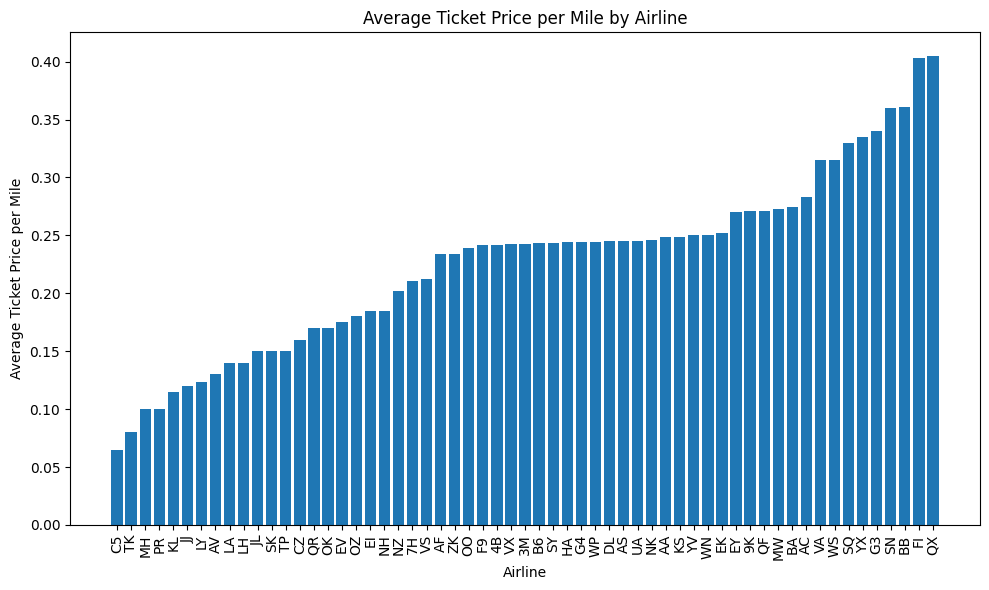

In [877]:
plt.figure(figsize=(10, 6))  # Set the size of the plot (width, height)
plt.bar(sorted_fares_airlines.index, sorted_fares_airlines.values)
plt.xlabel("Airline")
plt.ylabel("Average Ticket Price per Mile")
plt.title("Average Ticket Price per Mile by Airline")
plt.xticks(rotation=90)
plt.tight_layout() 
plt.show()

In [878]:
fares_airlines_in_stocks = fares_airlines[fares_airlines.index.isin(airlines_in_stocks)]
sorted_fares_airlines_in_stocks = fares_airlines_in_stocks.sort_values(ascending=True)
print(sorted_fares_airlines_in_stocks)

airline_id
OO    0.239474
B6    0.243085
HA    0.243972
DL    0.244735
AS    0.244792
UA    0.245546
NK    0.245867
AA    0.248701
WN    0.250709
Name: avg_fare_per_mile, dtype: float64


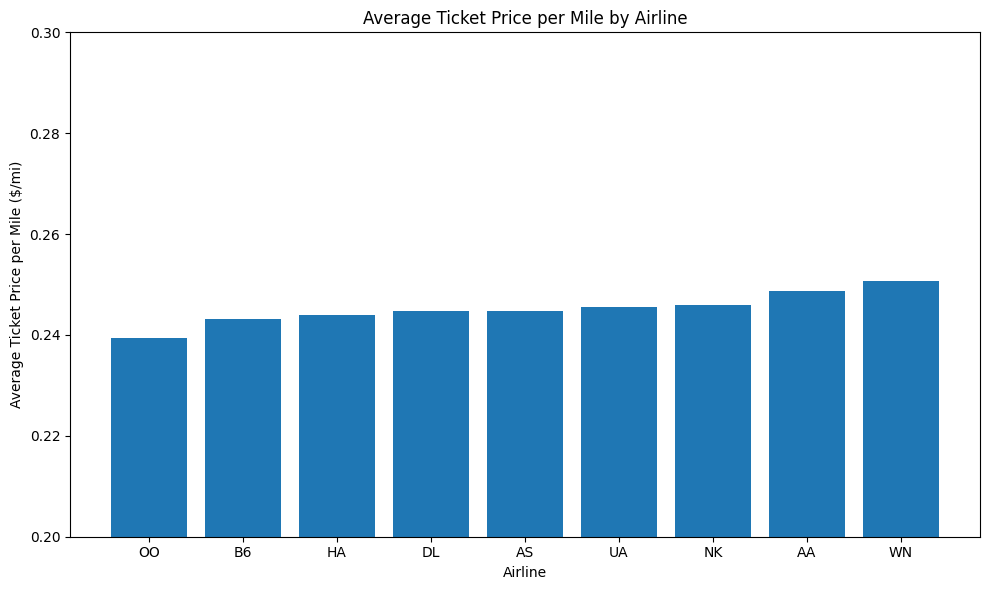

In [879]:
plt.figure(figsize=(10, 6))  # Set the size of the plot (width, height)
plt.bar(sorted_fares_airlines_in_stocks.index, sorted_fares_airlines_in_stocks.values)
plt.xlabel("Airline")
plt.ylabel("Average Ticket Price per Mile ($/mi)")
plt.ylim(bottom=0.2, top=0.3)
plt.title("Average Ticket Price per Mile by Airline")
plt.tight_layout() 
plt.show()

In [880]:
avg_fares_airlines = fares_copy.groupby('airline_id')['avg_fare'].mean()
sorted_avg_fares_airlines = avg_fares_airlines.sort_values(ascending=True)
print(sorted_avg_fares_airlines)

airline_id
PR     10.000000
C5     10.000000
TK     20.000000
BB     22.076154
MW     26.778136
WP     30.934615
9K     33.709434
7H     38.758989
AV     45.000000
4B     55.523356
OZ     60.000000
3M     63.262148
MH     70.000000
LY     70.000000
ZK     70.310118
KS     75.489744
YV     80.000000
EY     80.000000
KL     82.500000
JJ    130.000000
JL    133.333333
YX    140.000000
VS    146.666667
EV    150.000000
BA    169.230769
LA    170.000000
OK    180.000000
AC    195.714286
DL    205.991683
EI    215.000000
AF    215.333333
AA    220.624421
G4    223.443344
EK    231.666667
TP    232.500000
NH    245.000000
UA    246.808369
OO    248.626579
NZ    251.428571
AS    254.161392
B6    265.684428
NK    267.968128
SK    280.000000
F9    287.989859
WN    293.278229
FI    313.333333
G3    320.000000
HA    326.214556
SY    330.502595
CZ    350.000000
QR    385.000000
LH    410.000000
SN    430.000000
VX    434.583224
WS    440.000000
QF    447.142857
SQ    465.000000
VA    592.500000
QX 

## Fares-Delay Graphs

In [888]:
processed_traffic = pd.read_csv('processed_traffic.csv')
processed_traffic

,airline_id,distance,avgDelay,avgFare,airline_id_hotkey
0,AA,1773.0,8.25,432.582599,1
1,AA,1773.0,6.25,432.582599,1
2,AA,632.0,9.00,148.681660,1
3,AA,600.0,5.00,148.953222,1
4,AA,1587.0,38.25,382.463768,1
...,...,...,...,...,...
1018941,UA,550.0,4.25,128.119181,9
1018942,UA,2288.0,37.75,544.455055,9
1018943,UA,909.0,7.50,211.690722,9
1018944,UA,1222.0,26.00,309.176361,9


In [889]:
processed_traffic = processed_traffic[processed_traffic['avgFare'] != 0]

In [890]:
processed_traffic['avgFare'].describe().apply(lambda x: format(x, 'f'))

count    827168.000000
mean        239.158906
std         159.987236
min          10.000000
25%         110.937598
50%         207.039696
75%         315.962248
max        1225.227848
Name: avgFare, dtype: object

In [891]:
processed_traffic['avgDelay'].describe().apply(lambda x: format(x, 'f'))

count    827168.000000
mean         14.564630
std          17.256866
min           0.250000
25%           5.500000
50%           9.000000
75%          17.000000
max         547.250000
Name: avgDelay, dtype: object

In [892]:
processed_traffic['distance'].describe().apply(lambda x: format(x, 'f'))

count    827168.000000
mean        976.882903
std         661.726109
min          31.000000
25%         447.000000
50%         849.000000
75%        1246.000000
max        4983.000000
Name: distance, dtype: object

In [893]:
def grouping_function(dist, bucket_size, buckets):
    upper_bound = bucket_size * buckets
    curr = 1
    while curr*bucket_size < upper_bound and dist > curr*bucket_size:
        curr += 1
    return curr

bucket_size = 100
buckets = 15

processed_traffic['bucket'] = processed_traffic['distance'].apply(lambda x: grouping_function(x, bucket_size, buckets))

In [894]:
processed_traffic

,airline_id,distance,avgDelay,avgFare,airline_id_hotkey,bucket
0,AA,1773.0,8.25,432.582599,1,15
1,AA,1773.0,6.25,432.582599,1,15
2,AA,632.0,9.00,148.681660,1,7
3,AA,600.0,5.00,148.953222,1,6
4,AA,1587.0,38.25,382.463768,1,15
...,...,...,...,...,...,...
1018941,UA,550.0,4.25,128.119181,9,6
1018942,UA,2288.0,37.75,544.455055,9,15
1018943,UA,909.0,7.50,211.690722,9,10
1018944,UA,1222.0,26.00,309.176361,9,13


In [895]:
processed_traffic.drop('distance', axis=1, inplace=True)

In [896]:
group_df = processed_traffic.groupby(['airline_id', 'bucket'])

airline_bucket = group_df.groups.keys()
all_r_sq = []
logR = []

for v in airline_bucket:
    df = group_df.get_group(v)
    X = df['avgFare']
    y = df['avgDelay']
    X = X.to_numpy().reshape(-1, 1)
    y = y.to_numpy().reshape(-1, 1)

    linear_model = LinearRegression()
    linear_model.fit(X, y)

    slope = format(int(linear_model.coef_[0]), '.3f')
    constant = format(int(linear_model.intercept_), '.1f')
    r_squared = format(linear_model.score(X, y), '.3f')

    all_r_sq.append(float(r_squared))


    y = np.log(y)
    y = y.reshape(-1, 1)

    linear_model = LinearRegression()
    linear_model.fit(X, y)

    slope = format(int(linear_model.coef_[0]), '.3f')
    constant = format(int(linear_model.intercept_), '.1f')
    r_squared = format(linear_model.score(X, y), '.3f')

    logR.append(float(r_squared))


    # plt.figure(figsize=(5, 2))
    # plt.title(f'{v}'+f' R^2:{r_squared}' + f'  y={slope}x+{constant}')
    # plt.ylabel('Average Delay (min)')
    # plt.xlabel('Average Fare ($)')
    # plt.scatter(X, y)
    # plt.show()

In [897]:
processed_traffic['avgFare'].describe().apply(lambda x: format(x, '.1f'))

count    827168.0
mean        239.2
std         160.0
min          10.0
25%         110.9
50%         207.0
75%         316.0
max        1225.2
Name: avgFare, dtype: object

In [898]:
processed_traffic_no_zeros = processed_traffic[processed_traffic['avgDelay'] != 0]

In [899]:
processed_traffic_no_zeros['avgFare'].describe().apply(lambda x: format(x, '.1f'))

count    827168.0
mean        239.2
std         160.0
min          10.0
25%         110.9
50%         207.0
75%         316.0
max        1225.2
Name: avgFare, dtype: object

In [900]:
processed_traffic_no_zeros['avgDelay'].describe().apply(lambda x: format(x, '.1f'))

count    827168.0
mean         14.6
std          17.3
min           0.2
25%           5.5
50%           9.0
75%          17.0
max         547.2
Name: avgDelay, dtype: object

In [901]:
group_processed_no_zeros = processed_traffic_no_zeros.groupby(['airline_id', 'bucket'])

In [902]:
airline_bucket = group_processed_no_zeros.groups.keys()
all_r_sq_no_zero = []
logR_no_zero = []

for v in airline_bucket:
    df = group_processed_no_zeros.get_group(v)
    X = df['avgFare']
    y = df['avgDelay']
    X = X.to_numpy().reshape(-1, 1)
    y = y.to_numpy().reshape(-1, 1)

    linear_model = LinearRegression()
    linear_model.fit(X, y)

    slope = format(int(linear_model.coef_[0]), '.3f')
    constant = format(int(linear_model.intercept_), '.1f')
    r_squared = format(linear_model.score(X, y), '.3f')

    all_r_sq_no_zero.append(float(r_squared))


    y = np.log(y)
    y = y.reshape(-1, 1)

    linear_model = LinearRegression()
    linear_model.fit(X, y)

    slope = format(int(linear_model.coef_[0]), '.3f')
    constant = format(int(linear_model.intercept_), '.1f')
    r_squared = format(linear_model.score(X, y), '.3f')

    logR_no_zero.append(float(r_squared))

    # plt.figure(figsize=(5, 2))
    # plt.title(f'{v}'+f' R^2:{r_squared}' + f'  y={slope}x+{constant}')
    # plt.ylabel('Average Delay (min)')
    # plt.xlabel('Average Fare ($)')
    # plt.scatter(X, y)
    # plt.show()

In [903]:
processed_min_delay_5 = processed_traffic[processed_traffic['avgDelay'] >= 5.0]
processed_min_delay_5

,airline_id,avgDelay,avgFare,airline_id_hotkey,bucket
0,AA,8.25,432.582599,1,15
1,AA,6.25,432.582599,1,15
2,AA,9.00,148.681660,1,7
3,AA,5.00,148.953222,1,6
4,AA,38.25,382.463768,1,15
...,...,...,...,...,...
1018938,UA,18.00,171.021136,9,8
1018942,UA,37.75,544.455055,9,15
1018943,UA,7.50,211.690722,9,10
1018944,UA,26.00,309.176361,9,13


In [904]:
processed_min_delay_5['avgDelay'].describe().apply(lambda x: format(x, '.1f'))

count    679661.0
mean         16.8
std          18.3
min           5.0
25%           7.2
50%          11.0
75%          19.8
max         547.2
Name: avgDelay, dtype: object

In [905]:
group_min_delay_5 = processed_min_delay_5.groupby(['airline_id', 'bucket'])
airline_bucket = group_min_delay_5.groups.keys()

all_r_sq_min_delay_5 = []
logR_min_5 = []

for v in airline_bucket:
    df = group_min_delay_5.get_group(v)
    X = df['avgFare']
    y = df['avgDelay']
    X = X.to_numpy().reshape(-1, 1)
    y = y.to_numpy().reshape(-1, 1)

    linear_model = LinearRegression()
    linear_model.fit(X, y)

    slope = format(int(linear_model.coef_[0]), '.3f')
    constant = format(int(linear_model.intercept_), '.1f')
    r_squared = format(linear_model.score(X, y), '.3f')

    all_r_sq_min_delay_5.append(float(r_squared))



    y = np.log(y)
    y = y.reshape(-1, 1)

    linear_model = LinearRegression()
    linear_model.fit(X, y)

    slope = format(int(linear_model.coef_[0]), '.3f')
    constant = format(int(linear_model.intercept_), '.1f')
    r_squared = format(linear_model.score(X, y), '.3f')

    logR_min_5.append(float(r_squared))

    # plt.figure(figsize=(5, 2))
    # plt.title(f'{v}'+f' R^2:{r_squared}' + f'  y={slope}x+{constant}')
    # plt.ylabel('Average Delay (min)')
    # plt.xlabel('Average Fare ($)')
    # plt.scatter(X, y)
    # plt.show()

In [906]:
import statistics 
#Getting rid of NaN
all_r_sq = np.array(all_r_sq)
all_r_sq_min_delay_5 = np.array(all_r_sq_min_delay_5)
all_r_sq_no_zero = np.array(all_r_sq_no_zero)

logR = np.array(logR)
logR_no_zero = np.array(logR_no_zero)
logR_min_5 = np.array(logR_min_5)

all_r_sq = all_r_sq[~np.isnan(all_r_sq)]
all_r_sq_min_delay_5 = all_r_sq_min_delay_5[~np.isnan(all_r_sq_min_delay_5)]
all_r_sq_no_zero = all_r_sq_no_zero[~np.isnan(all_r_sq_no_zero)]

logR = logR[~np.isnan(logR)]
logR_no_zero = logR_no_zero[~np.isnan(logR_no_zero)]
logR_min_5 = logR_min_5[~np.isnan(logR_min_5)]

print(statistics.mean(all_r_sq))
print(statistics.mean(all_r_sq_min_delay_5))
print(statistics.mean(all_r_sq_no_zero))
print(statistics.mean(logR))
print(statistics.mean(logR_no_zero))
print(statistics.mean(logR_min_5))


0.005049645390070922
0.006581560283687943
0.005049645390070922
0.004794326241134752
0.004794326241134752
0.005617021276595744


In [907]:
processed_min_delay_5 = processed_traffic[processed_traffic['avgDelay'] >= 5.0]
processed_min_delay_5

,airline_id,avgDelay,avgFare,airline_id_hotkey,bucket
0,AA,8.25,432.582599,1,15
1,AA,6.25,432.582599,1,15
2,AA,9.00,148.681660,1,7
3,AA,5.00,148.953222,1,6
4,AA,38.25,382.463768,1,15
...,...,...,...,...,...
1018938,UA,18.00,171.021136,9,8
1018942,UA,37.75,544.455055,9,15
1018943,UA,7.50,211.690722,9,10
1018944,UA,26.00,309.176361,9,13


In [908]:
processed_traffic

,airline_id,avgDelay,avgFare,airline_id_hotkey,bucket
0,AA,8.25,432.582599,1,15
1,AA,6.25,432.582599,1,15
2,AA,9.00,148.681660,1,7
3,AA,5.00,148.953222,1,6
4,AA,38.25,382.463768,1,15
...,...,...,...,...,...
1018941,UA,4.25,128.119181,9,6
1018942,UA,37.75,544.455055,9,15
1018943,UA,7.50,211.690722,9,10
1018944,UA,26.00,309.176361,9,13


In [909]:
processed_traffic['avgDelay'].describe().apply(lambda x: format(x, '.1f'))

count    827168.0
mean         14.6
std          17.3
min           0.2
25%           5.5
50%           9.0
75%          17.0
max         547.2
Name: avgDelay, dtype: object

In [910]:
from sklearn.preprocessing import MinMaxScaler

normalized_columns = ['avgDelay', 'avgFare']
other_columns = ['airline_id', 'bucket']

scaler = MinMaxScaler()

test = pd.DataFrame()

test[other_columns] = processed_traffic[other_columns]
test[normalized_columns] = scaler.fit_transform(processed_traffic[normalized_columns])
test

,airline_id,bucket,avgDelay,avgFare
0,AA,15,0.014625,0.347739
1,AA,15,0.010969,0.347739
2,AA,7,0.015996,0.114120
3,AA,6,0.008684,0.114343
4,AA,15,0.069470,0.306497
...,...,...,...,...
1018941,UA,6,0.007313,0.097199
1018942,UA,15,0.068556,0.439798
1018943,UA,10,0.013254,0.165969
1018944,UA,13,0.047075,0.246190


In [911]:
group_normalized = test.groupby(['airline_id', 'bucket'])

airline_bucket = group_normalized.groups.keys()
all_normalized_r_sq = []

for v in airline_bucket:
    df = group_normalized.get_group(v)
    X = df['avgFare']
    y = df['avgDelay']
    X = X.to_numpy().reshape(-1, 1)
    y = y.to_numpy().reshape(-1, 1)

    linear_model = LinearRegression()
    linear_model.fit(X, y)

    slope = format(int(linear_model.coef_[0]), '.3f')
    constant = format(int(linear_model.intercept_), '.1f')
    r_squared = format(linear_model.score(X, y), '.3f')

    all_normalized_r_sq.append(float(r_squared))

    # plt.figure(figsize=(5, 2))
    # plt.title(f'{v}'+f' R^2:{r_squared}' + f'  y={slope}x+{constant}')
    # plt.ylabel('Average Delay (min)')
    # plt.xlabel('Average Fare ($)')
    # plt.scatter(X, y)
    # plt.show()

In [912]:
scaler = MinMaxScaler()

test_no_zeros = pd.DataFrame()

test_no_zeros[other_columns] = processed_min_delay_5[other_columns]
test_no_zeros[normalized_columns] = scaler.fit_transform(processed_min_delay_5[normalized_columns])
test_no_zeros

,airline_id,bucket,avgDelay,avgFare
0,AA,15,0.005994,0.347739
1,AA,15,0.002305,0.347739
2,AA,7,0.007377,0.114120
3,AA,6,0.000000,0.114343
4,AA,15,0.061319,0.306497
...,...,...,...,...
1018938,UA,8,0.023974,0.132503
1018942,UA,15,0.060396,0.439798
1018943,UA,10,0.004610,0.165969
1018944,UA,13,0.038728,0.246190


In [913]:
group_normalized_min_5 = test.groupby(['airline_id', 'bucket'])

airline_bucket = group_normalized_min_5.groups.keys()
all_normalized_min_5_r_sq = []

for v in airline_bucket:
    df = group_normalized_min_5.get_group(v)
    X = df['avgFare']
    y = df['avgDelay']
    X = X.to_numpy().reshape(-1, 1)
    y = y.to_numpy().reshape(-1, 1)

    linear_model = LinearRegression()
    linear_model.fit(X, y)

    slope = format(int(linear_model.coef_[0]), '.3f')
    constant = format(int(linear_model.intercept_), '.1f')
    r_squared = format(linear_model.score(X, y), '.3f')

    all_normalized_min_5_r_sq.append(float(r_squared))

    # plt.figure(figsize=(5, 2))
    # plt.title(f'{v}'+f' R^2:{r_squared}' + f'  y={slope}x+{constant}')
    # plt.ylabel('Average Delay (min)')
    # plt.xlabel('Average Fare ($)')
    # plt.scatter(X, y)
    # plt.show()

In [914]:
all_normalized_r_sq = np.array(all_normalized_r_sq)
all_normalized_min_5_r_sq = np.array(all_normalized_min_5_r_sq)
all_normalized_r_sq = all_normalized_r_sq[~np.isnan(all_normalized_r_sq)]
all_normalized_min_5_r_sq = all_normalized_min_5_r_sq[~np.isnan(all_normalized_min_5_r_sq)]

print(statistics.mean(all_normalized_r_sq))
print(statistics.mean(all_normalized_min_5_r_sq))

0.005049645390070922
0.005049645390070922


In [919]:
processed_traffic

,airline_id,avgDelay,avgFare,airline_id_hotkey,bucket
0,AA,8.25,432.582599,1,15
1,AA,6.25,432.582599,1,15
2,AA,9.00,148.681660,1,7
3,AA,5.00,148.953222,1,6
4,AA,38.25,382.463768,1,15
...,...,...,...,...,...
1018941,UA,4.25,128.119181,9,6
1018942,UA,37.75,544.455055,9,15
1018943,UA,7.50,211.690722,9,10
1018944,UA,26.00,309.176361,9,13


In [923]:
processed_traffic.describe()

,avgDelay,avgFare,airline_id_hotkey,bucket
count,827168.000000,827168.000000,827168.000000,827168.000000
mean,14.564630,239.158906,6.171619,9.002905
std,17.256866,159.987236,3.943673,4.318220
min,0.250000,10.000000,1.000000,1.000000
25%,5.500000,110.937598,2.000000,5.000000
50%,9.000000,207.039696,7.000000,9.000000
75%,17.000000,315.962248,10.000000,13.000000
max,547.250000,1225.227848,12.000000,15.000000


-0.013897094371096534
0.36619718309859156


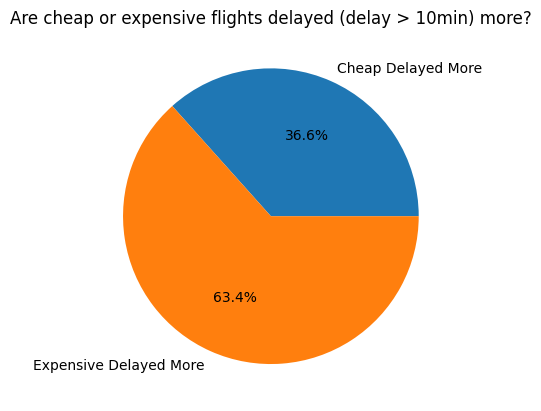

In [955]:
group_df = processed_traffic.groupby(['airline_id', 'bucket'])

airline_bucket = group_df.groups.keys()
delay_time = 10
count = 0
total = 0
diff = []

for v in airline_bucket:
    df = group_df.get_group(v)
    
    mean_fare = df['avgFare'].mean()

    cheap = df[df['avgFare'] < mean_fare]
    exp = df[df['avgFare'] >= mean_fare]

    cheap_delays = (cheap['avgDelay'] > delay_time).sum()
    cheap_total = len(cheap['avgDelay'])
    exp_delays = (exp['avgDelay'] > delay_time).sum()
    exp_total = len(exp['avgDelay'])

    cheap_pct = cheap_delays/cheap_total
    exp_pct = exp_delays/exp_total
    if cheap_pct > exp_pct:
        count += 1
    total += 1
    diff.append(cheap_pct-exp_pct)

diff = np.array(diff)
diff = diff[~np.isnan(diff)]
print(diff.mean())
print(count/total)

y = [count, total-count]
labels = ['Cheap Delayed More', 'Expensive Delayed More']

fig, ax = plt.subplots()
ax.pie(y, labels=labels, autopct='%1.1f%%')
plt.title('Are cheap or expensive flights delayed (delay > 10min) more?')
plt.show()